# Lead Scoring Case Study

## Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

There are a lot of leads generated in the initial stage, but only a few of them come out as paying customers. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

Goals of the Case Study: 

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

## Steps Of Our Intended Approach To Building The Required Model

1. Reading And Understanding The Data

- Importing Libraries
- Importing Dataset
- Understanding The Data
2. Data Quality Checks

- Checking Duplicate Values
- Checking Missing Values
3. Exploratory Data Analysis

- Data Cleaning and Treatment
- Categorical Variables Analysis
- Numerical Variables Analysis
4. Identifying Categorical Variables and Creating Dummy Variables

5. Model Building Using Logistic Regression

- Splitting The Dataset
- Rescaling
- Model Building Using RFE and Statsmodels
- Deriving Probabilities and Lead Score
- Confusion Matrix
- Finding Optimal Cut-OFF
- Plotting ROC Curve
6. Making The Predictions On Test Dataset

- Rescaling
- Making Predictions
- Confusion Matrix
7. Final Observation

- You can copy and paste this into a Word document or any text editor of your choice for further editing or use.







## A. Reading And Understanding The Data

### 1. Importing Libraries

In [1]:
#import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

#import warnings
import warnings
warnings.filterwarnings('ignore')

### 2. Importing Dataset

In [2]:
#import the dataset and read the first five rows

l_score = pd.read_csv("Leads.csv")

In [3]:
l_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### 3. Understanding The Data

In [4]:
#checking the shape of data

l_score.shape

(9240, 37)

In [5]:
#getting some descriptive information about the dataset

l_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
l_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Findings:
- There are total of 9240 rows and 37 columns in the dataset.

## B. Data Quality Checks

### 1. Checking Duplicate Values
- The two columns 'Prospect ID' and 'Lead Number' have to be checked for duplicate values.

In [7]:
sum(l_score.duplicated(subset = "Prospect ID"))==0

True

##### No duplicate values in 'Prospect ID' column

In [8]:
sum(l_score.duplicated(subset = "Lead Number"))==0

True

##### No duplicate values in 'Lead Number' column

#### Findings:
- No duplicate values were found in the above two columns meaning they are only used to indicate the ID number of the contacted
  people and are of no significance hence they can be dropped.

### 2. Checking Missing Values
- Checking the percentage of missing values in all the columns

In [9]:
round(100*(l_score.isnull().sum())/len(l_score.index), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

## C. Exploratory Data Analysis

### I. Data Cleaning and Treatment

#### 1. Dropping Non-Significant Columns

In [10]:
#dropping 'Prospect ID' and 'Lead Number' columns as they only have unique values with no importance in analysis

l_score.drop(['Prospect ID','Lead Number'], 1, inplace = True)

In [11]:
l_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

#### 2. Converting 'Select' values to NA values

In [12]:
l_score = l_score.replace('Select', np.nan)

In [13]:
l_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

#### 3. Dropping columns having more than 45% missing values in them

In [14]:
#dropping more than 45% missing value columns

cols_drop = l_score.columns
for i in cols_drop:
    if ((100*(l_score[i].isnull().sum()/len(l_score.index))) > 45):
        l_score.drop(i, 1, inplace = True)


In [15]:
#checking missing values percentage in remaining columns after dropping more than 45% missing value columns

round(100*(l_score.isnull().sum())/len(l_score.index), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

### II. Categorical Variables Analysis

#### 1. Analysing 'Country' column

In [16]:
#checking all value counts of 'country' column including the NA values

l_score['Country'].value_counts(dropna = False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

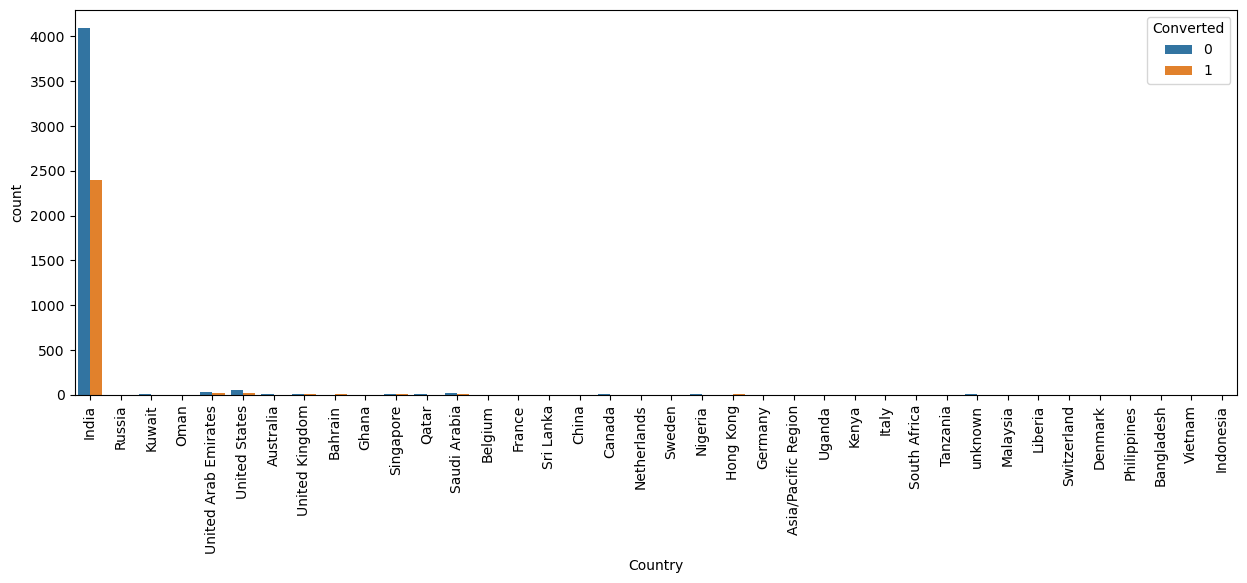

In [17]:
#visualising the spread of data in 'country' column

plt.figure(figsize=(15,5))
plt1 = sns.countplot(x='Country', hue='Converted', data=l_score)
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=90)
plt.show()


#### Findings:
- Since 'India' is most in number in non-missing values, we impute the missing values with 'India'

In [18]:
#replace 'country' column missing data with most common datapoint ie 'India'

l_score['Country'] = l_score['Country'].replace(np.nan, 'India')

In [19]:
#checking the spread of data in 'country' column after data imputation

l_score['Country'].value_counts(dropna = False)

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

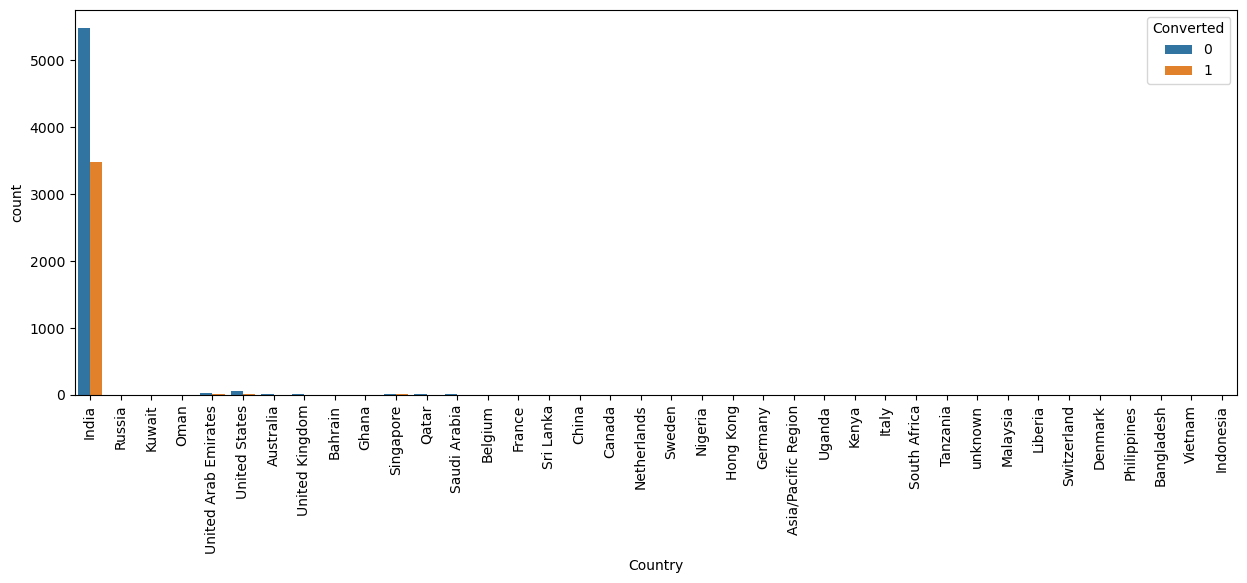

In [20]:
#visualising the spread of data in 'country' column after data imputation

plt.figure(figsize=(15, 5))
plt1 = sns.countplot(x='Country', hue='Converted', data=l_score)
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=90)
plt.show()


#### Findings:
- We see that number of values of 'India' is quite high (almost 98%) which indicates this data is highly skewed and will 
  influence the model incorrectly hence this column will be dropped towards the end of this analysis.

#### 2. Analysing 'City' column

In [21]:
#checking all value counts of 'city' column including the NA values

l_score['City'].value_counts(dropna = False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

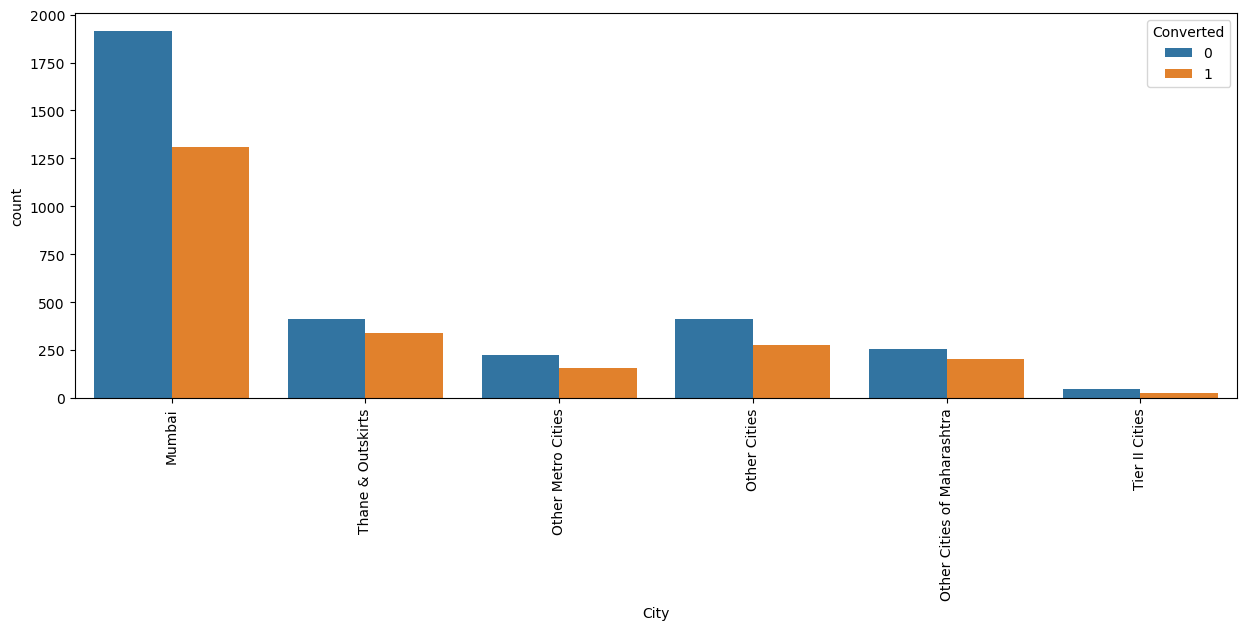

In [22]:
#visualising the spread of data in 'city' column

plt.figure(figsize=(15, 5))
plt2 = sns.countplot(x='City', hue='Converted', data=l_score)
plt2.set_xticklabels(plt2.get_xticklabels(), rotation=90)
plt.show()


#### Findings:
- Since 'Mumbai' is most in number in non-missing values, we impute the missing values with 'Mumbai'

In [23]:
#replace 'city' column missing data with most common datapoint ie 'Mumbai'

l_score['City'] = l_score['City'].replace(np.nan, 'Mumbai')

In [24]:
#checking the spread of data in 'city' column after data imputation

l_score['City'].value_counts(dropna = False)

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

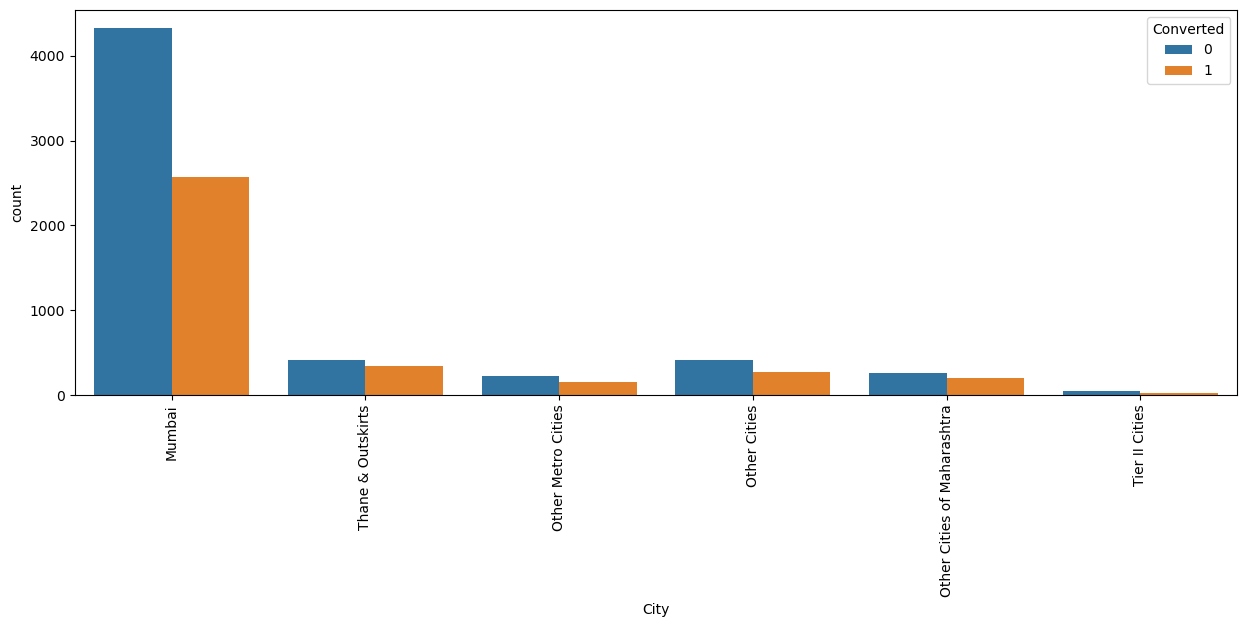

In [25]:
#visualising the spread of data in 'city' column after data imputation

plt.figure(figsize=(15, 5))
# Replace 'l_score.City' and 'l_score.Converted' with your actual data columns
sns.countplot(data=l_score, x='City', hue='Converted')
plt.xticks(rotation=90)
plt.show()


#### Findings:
- The data of this column are not too highly skewed and hence we shall retain this column for analysis

#### 3. Analysing 'Specialization' column

In [26]:
#checking all value counts of 'specialization' column including the NA values

l_score['Specialization'].value_counts(dropna = False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

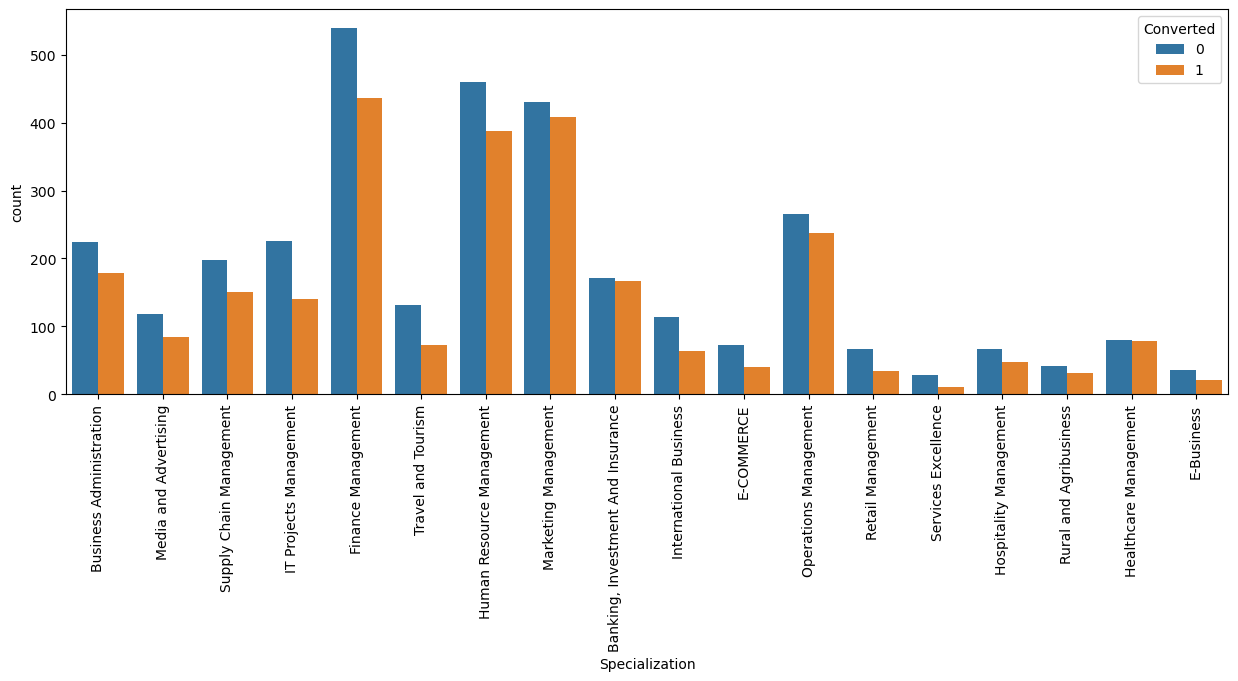

In [27]:
#visualising the spread of data in 'specialization' column

plt.figure(figsize=(15, 5))
sns.countplot(data=l_score, x='Specialization', hue='Converted')
plt.xticks(rotation=90)
plt.show()

##### Leads may not have mentioned their specializations because they either might still be students or their chosen specialization was not in list.
##### Hence it will be better to replace NA values with the term 'Not Specified'

In [28]:
#replacing 'specialization' column missing data with 'not specified'

l_score['Specialization'] = l_score['Specialization'].replace(np.nan, 'Not Specified')

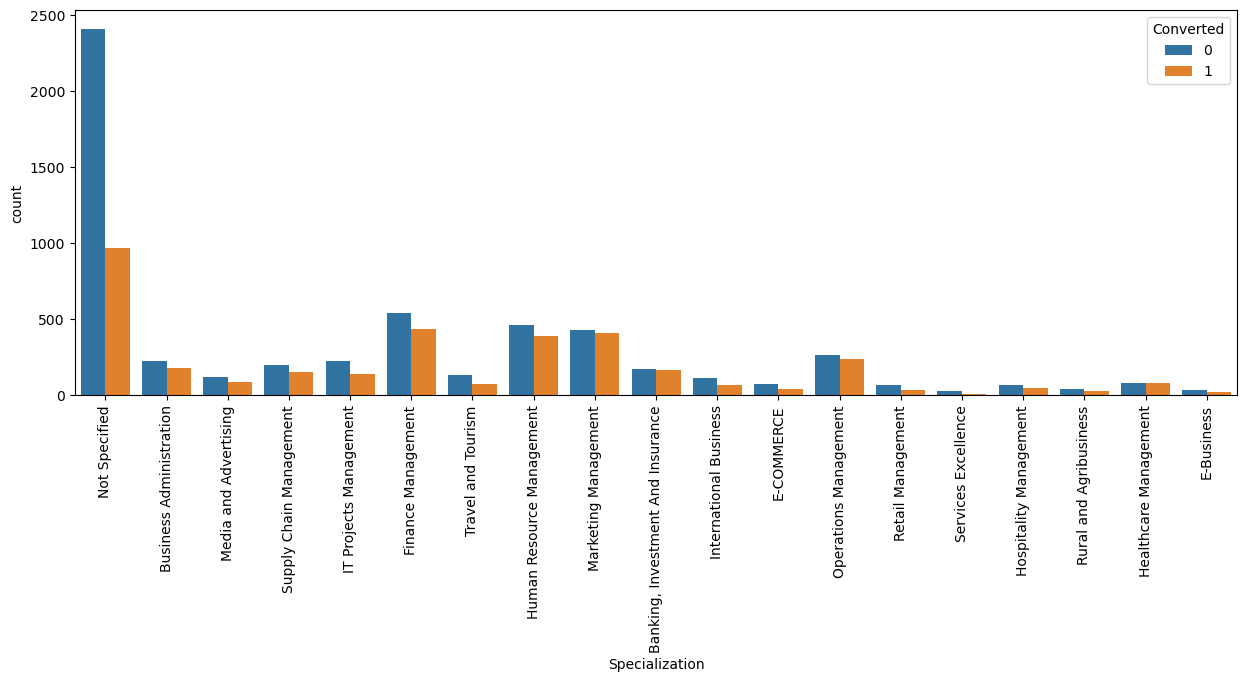

In [29]:
#visualising the spread of data in 'specialization' column after data correction

plt.figure(figsize=(15, 5))
sns.countplot(data=l_score, x='Specialization', hue='Converted')
plt.xticks(rotation=90)
plt.show()

#### Findings:
- We see that leads having different types of 'Management' specializations are more in number as well as have higher chances
  of getting converted. Hence we combine all the different 'management' specialization under one term 
  'Management Specialization'

In [30]:
#combining different management branches under one specialization

l_score['Specialization'] = l_score['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations') 

In [31]:
#checking the spread of data in 'specialization' column after data correction

l_score['Specialization'].value_counts(dropna = False)

Management_Specializations           4253
Not Specified                        3380
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

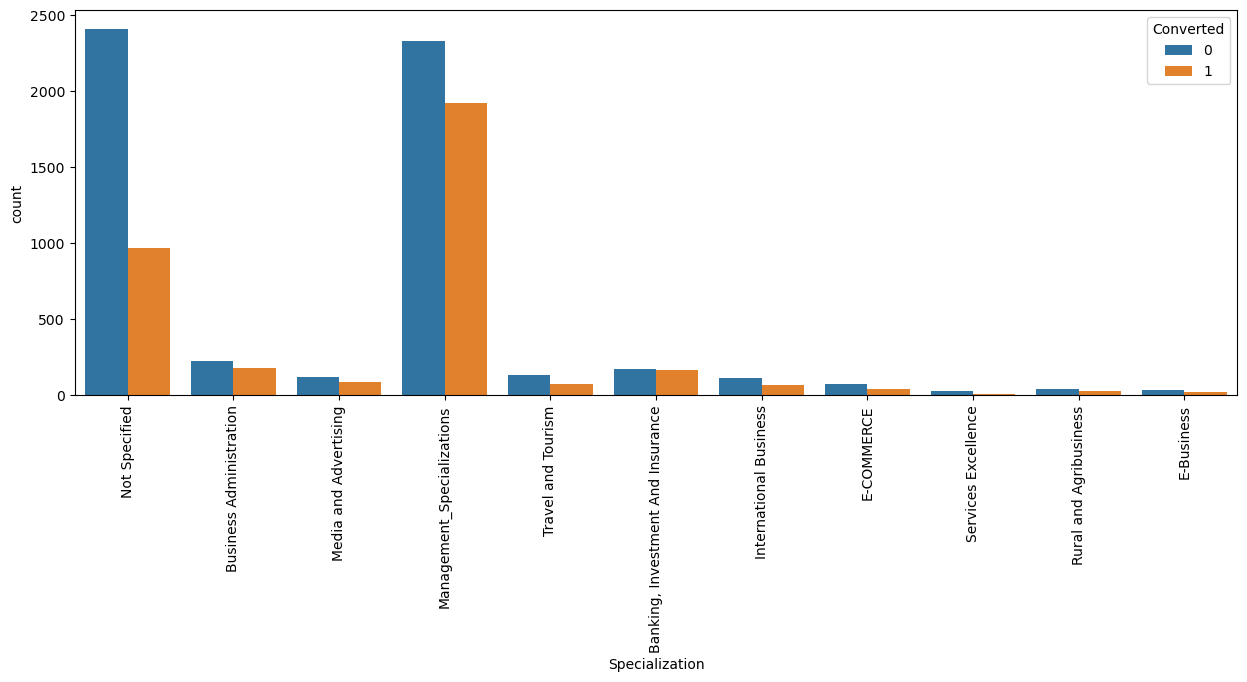

In [32]:
#visualising the spread of data in 'specialization' column after data correction

plt.figure(figsize=(15,5))
plt3 = sns.countplot(data=l_score, x='Specialization', hue='Converted')
plt3.set_xticklabels(plt3.get_xticklabels(), rotation=90)
plt.show()


#### Findings:
- This is a very significant variable as we can see the choice of specialization is a big influencer for lead conversion hence
  this column will be retained.

#### 4. Analysing 'What is your current occupation' column

In [33]:
#checking all value counts of 'What is your current occupation' column including the NA values

l_score['What is your current occupation'].value_counts(dropna = False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

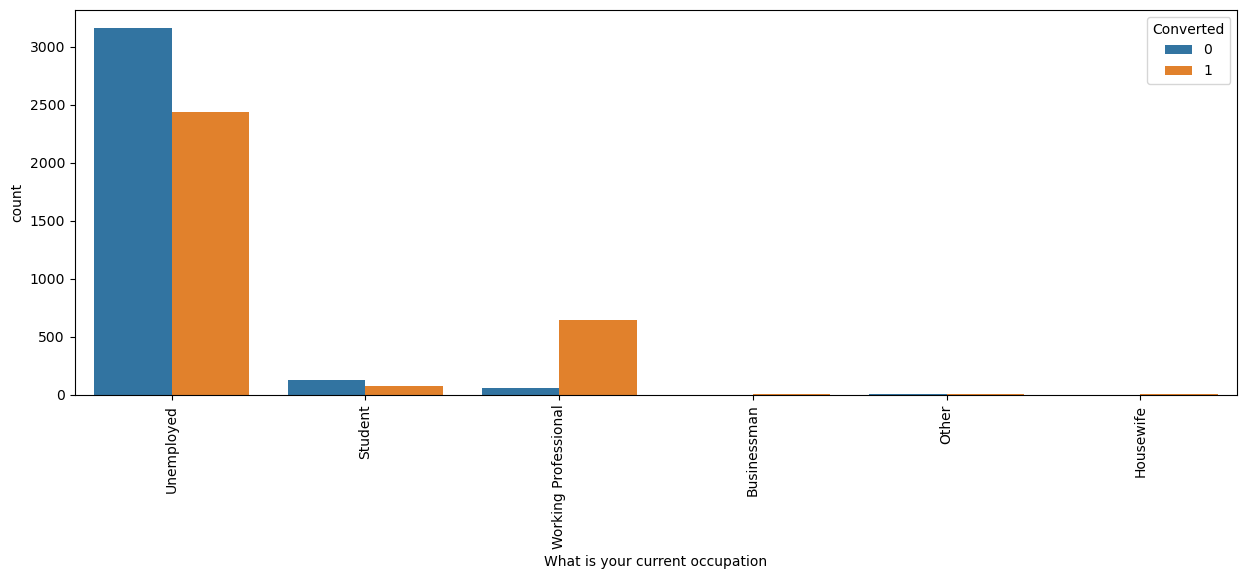

In [34]:
#visualising the spread of data in 'What is your current occupation' column

plt.figure(figsize=(15, 5))
plt4 = sns.countplot(data=l_score, x='What is your current occupation', hue='Converted')
plt4.set_xticklabels(plt4.get_xticklabels(), rotation=90)
plt.show()


In [35]:
#replace 'What is your current occupation' column missing data with most common datapoint ie 'Unemployed'

l_score['What is your current occupation'] = l_score['What is your current occupation'].replace(np.nan, 'Unemployed')

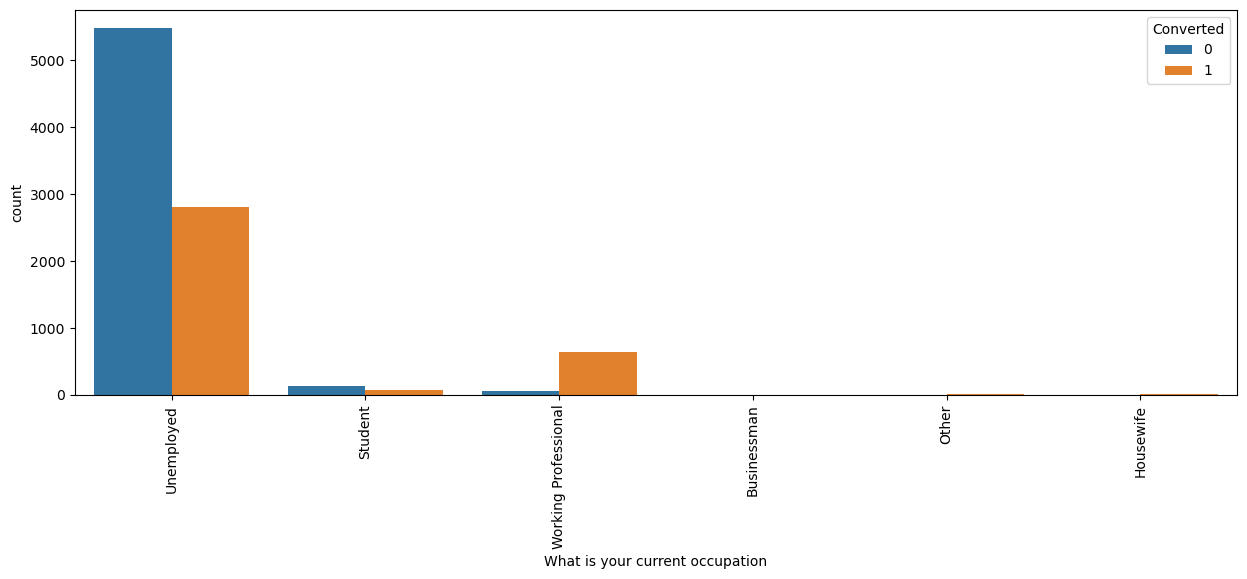

In [36]:
#visualising the spread of data in 'What is your current occupation' column after data imputation

plt.figure(figsize=(15, 5))
plt4 = sns.countplot(data=l_score, x='What is your current occupation', hue='Converted')
plt4.set_xticklabels(plt4.get_xticklabels(), rotation=90)
plt.show()

#### Findings:
- Although data may look skewed in favour of 'Unemployed' leads, we also identify a very interesting trend: leads who are 
  'working professionals' are more likely to get converted. Hence we shall retain this column.


#### 5. Analysing 'What matters most to you in choosing a course' column

In [37]:
#checking all value counts of 'What matters most to you in choosing a course' column including the NA values

l_score['What matters most to you in choosing a course'].value_counts(dropna = False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [38]:
#replace 'What matters most to you in choosing a course' column missing data with most common datapoint ie 'Better Career Prospects'

l_score['What matters most to you in choosing a course'] = l_score['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [39]:
#checking the spread of data in 'What matters most to you in choosing a course' column after data imputation

l_score['What matters most to you in choosing a course'].value_counts(dropna = False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

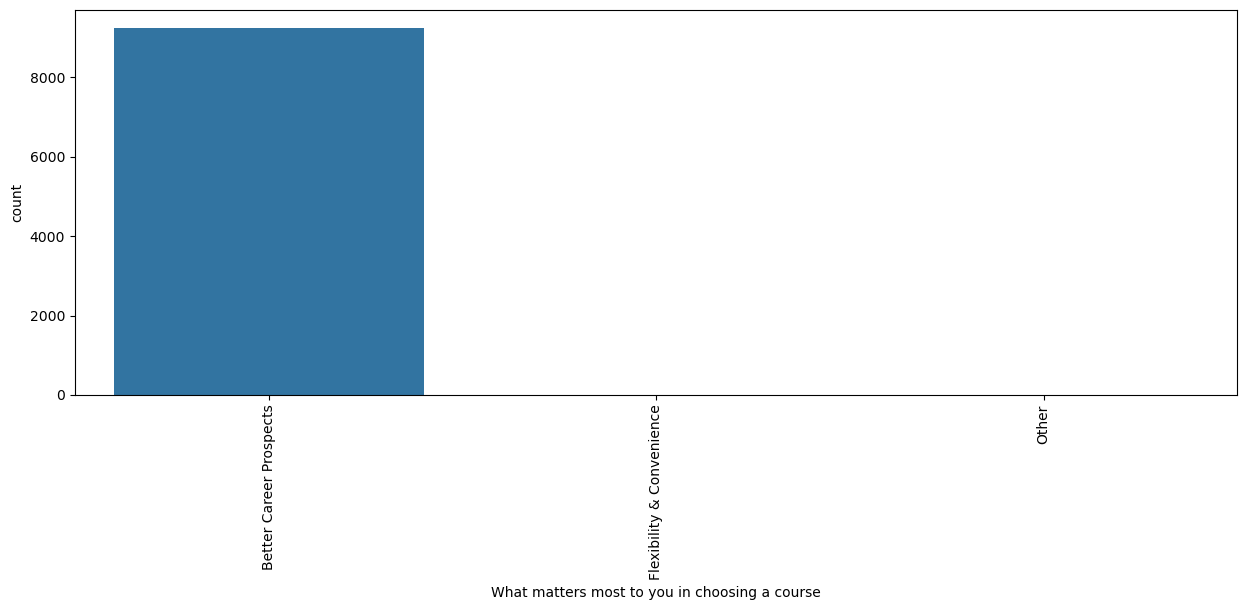

In [40]:
#visualising the spread of data in 'What matters most to you in choosing a course' column after data imputation

plt.figure(figsize=(15, 5))
plt5 = sns.countplot(data=l_score, x='What matters most to you in choosing a course')
plt5.set_xticklabels(plt5.get_xticklabels(), rotation=90)
plt.show()

#### Findings:
- Almost 99% of data is skewed towards 'Better Career Prospect' and hence this column will be dropped towards the end of this
  analysis

#### 6. Analysing 'Tags' column

In [41]:
#checking all value counts of 'tags' column including the NA values

l_score.Tags.value_counts(dropna = False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

##### Once again there may be many different reasons why a lead has not been tagged. Also the data is not heavily imbalanced enough to impute with most common datapoint.
##### Hence we replace NA values with 'not specified'

In [42]:
#replace 'tags' column missing data with the term 'not specified'

l_score['Tags'] = l_score['Tags'].replace(np.nan, 'Not Specified')

In [43]:
#checking the spread of data in 'tags' column after data correction

l_score.Tags.value_counts(dropna = False)

Not Specified                                        3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

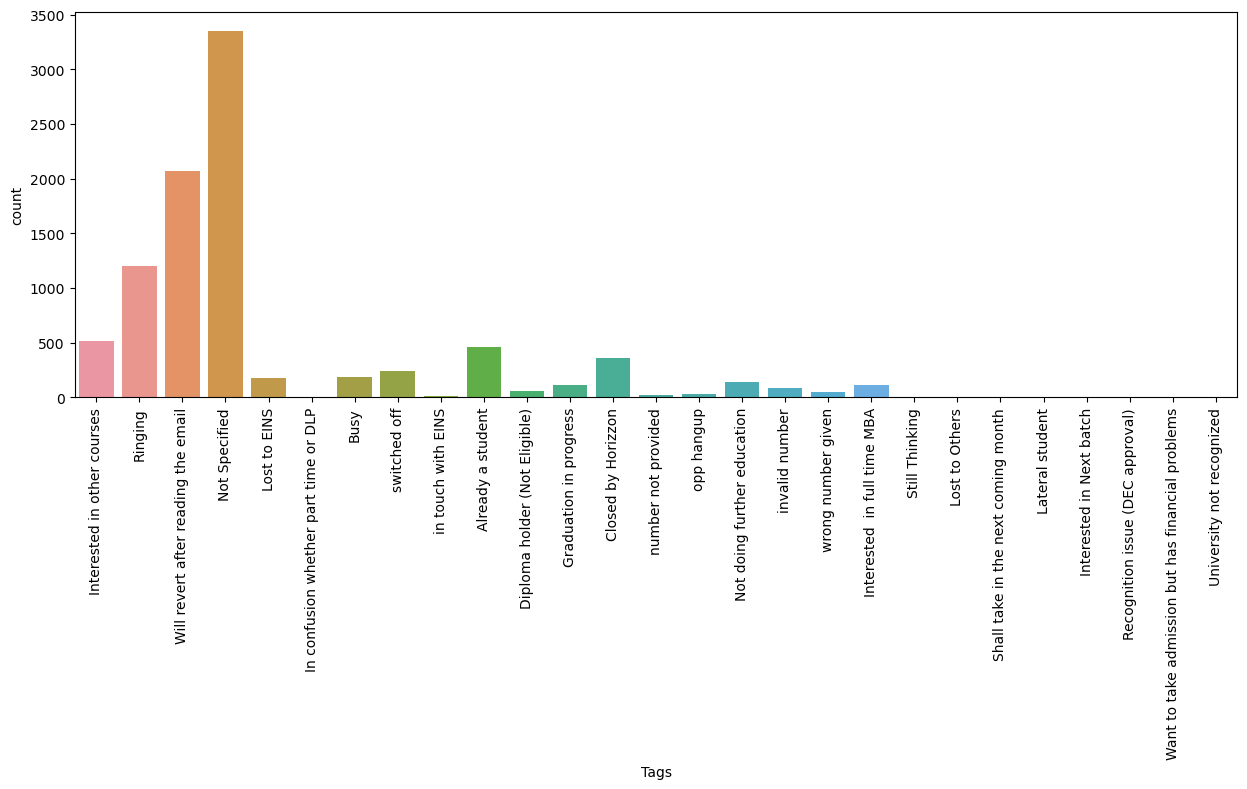

In [44]:
#visualising the spread of data in 'tags' column after data correction

plt.figure(figsize=(15, 5))
plt6 = sns.countplot(data=l_score, x='Tags')
plt6.set_xticklabels(plt6.get_xticklabels(), rotation=90)
plt.show()

#### Findings:
- Leads with the tag 'Will revert after reading mail' have the highest conversion probability, followed by 'Lost To EINS,' 'Closed By Horizon,' and 'Busy.'

- Given the presence of numerous low-frequency tags, it may be beneficial to group them under a single category, such as 'Other_Tags,' to better understand the overall distribution and analysis of the data.

In [45]:
#replace 'tags' column low frequency data with term 'Other_Tags'

l_score['Tags'] = l_score['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

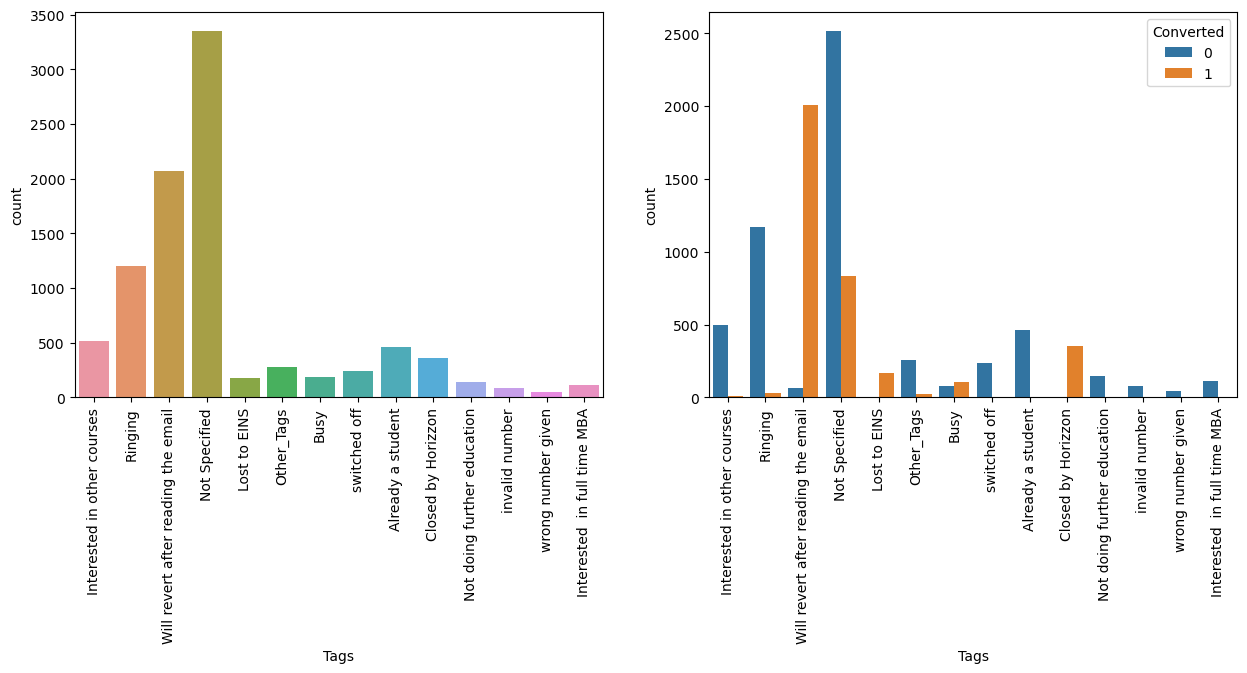

In [46]:
#visualising the spread of data in 'tags' column after data clubbing
plt.figure(figsize=(15, 5))

# Create the first countplot
plt.subplot(1, 2, 1)
sns.countplot(data=l_score, x='Tags')
plt.xticks(rotation=90)

# Create the second countplot
plt.subplot(1, 2, 2)
sns.countplot(data=l_score, x='Tags', hue='Converted')
plt.xticks(rotation=90)

plt.show()


##### Still a few more of the data points can be clubbed under Other_Tags column which are showing low frequency to improve the visualization spread

In [47]:
#replace 'tags' column low frequency data with term 'Other_Tags'

l_score['Tags'] = l_score['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

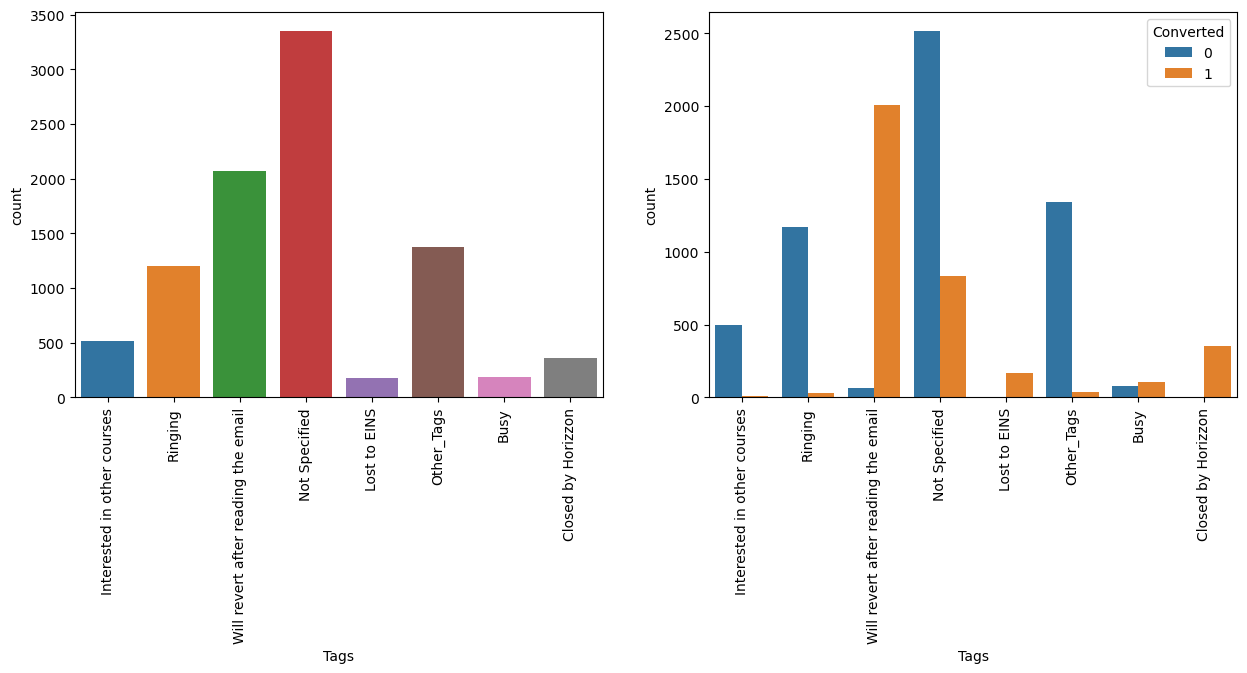

In [48]:
#visualising the spread of data in 'tags' column after data clubbing

plt.figure(figsize=(15, 5))

# Create the first countplot
plt.subplot(1, 2, 1)
sns.countplot(data=l_score, x='Tags')
plt.xticks(rotation=90)

# Create the second countplot
plt.subplot(1, 2, 2)
sns.countplot(data=l_score, x='Tags', hue='Converted')
plt.xticks(rotation=90)

plt.show()


#### Findings:
- Leads that are tagged as 'Will revert after reading mail' have the highest probability of being converted. They are followed closely by leads tagged as 'Lost To EINS' and 'Closed By Horizon.' Therefore, it is advisable to focus efforts on generating more leads associated with these tags to maximize conversion rates.

- Leads with the tags 'Ringing' and 'Not Specified' are more abundant in terms of numbers. To optimize conversion rates, it is essential to concentrate efforts on these tags and work towards maximizing conversions within these categories.

#### 7. Analysing 'Lead Source' column

In [49]:
#checking all value counts of 'Lead Source' column including the NA values

l_score['Lead Source'].value_counts(dropna = False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

##### Once again we see a lot of the data points with very low frequency which we can club together under one single term 'Others' along with the missing values as well as they are low in number.
##### Certain datapoints like 'google' and 'Google' which are same and 'Facebook' and 'Social Media' which are similar have also been clubbed together.

In [50]:
l_score['Lead Source'] = l_score['Lead Source'].replace(['bing',
                                      'Click2call',
                                       'Press_Release',
                                       'Live Chat',
                                       'youtubechannel',
                                       'testone', 'Pay per Click Ads', 'welearnblog_Home', 'WeLearn', 'blog',
                                                   'NC_EDM'] , 'Others')
l_score['Lead Source'] = l_score['Lead Source'].replace(['google'], 'Google')
l_score['Lead Source'] = l_score['Lead Source'].replace(['Facebook'], 'Social Media')
l_score['Lead Source'] = l_score['Lead Source'].replace(np.nan, 'Others')

In [51]:
#checking the spread of data in 'Lead Source' column after data imputation

l_score['Lead Source'].value_counts(dropna = False)

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
Others                57
Name: Lead Source, dtype: int64

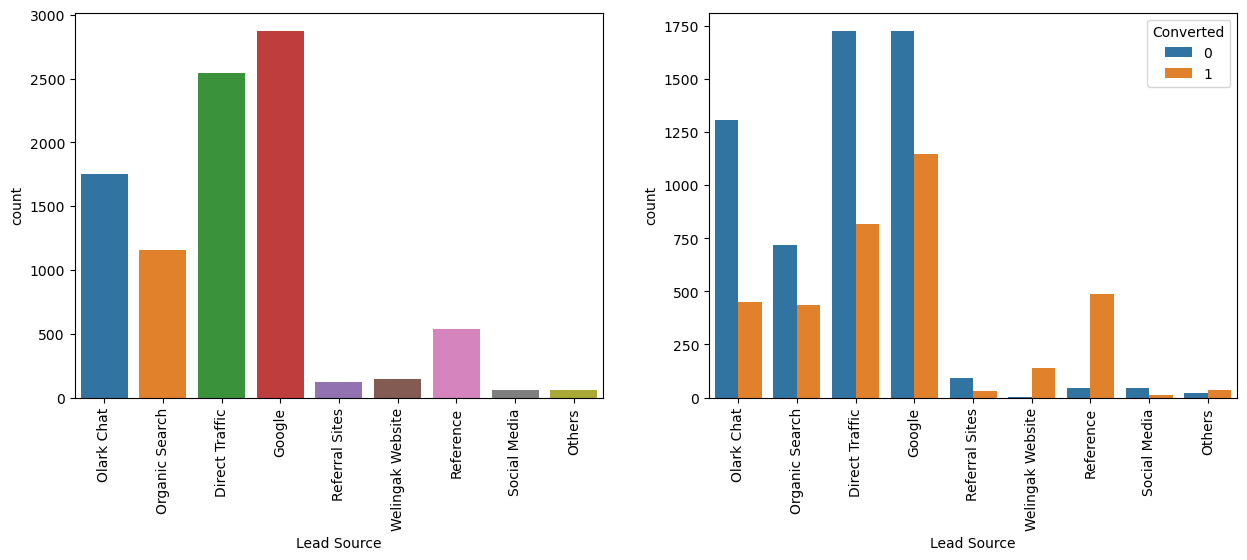

In [52]:
#visualising the spread of data in 'Lead Source' column after data imputation
plt.figure(figsize=(15, 5))

# Create the first countplot
plt.subplot(1, 2, 1)
sns.countplot(data=l_score, x='Lead Source')
plt.xticks(rotation=90)

# Create the second countplot
plt.subplot(1, 2, 2)
sns.countplot(data=l_score, x='Lead Source', hue='Converted')
plt.xticks(rotation=90)

plt.show()


#### Findings:
- The data shows that 'Google' and 'Direct Traffic' are responsible for generating the highest number of leads and lead conversions. Additionally, 'Welingak Website,' 'Reference,' and 'Others' stand out for their remarkable lead conversion rates. Due to the significance of these columns, it is advisable to retain them in the analysis.

- To enhance the overall lead conversion rate, it is recommended to concentrate efforts on improving the conversion rates of 'Direct Traffic' and 'Google' leads. Simultaneously, there should be a focus on generating more leads from sources like 'Reference' and 'Welingak Website,' as they exhibit particularly strong conversion rates.

#### 8. Analysing 'Last Activity' column

In [53]:
#checking all value counts of 'Last Activity' column including the NA values

l_score['Last Activity'].value_counts(dropna = False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

##### Once again we see a lot of the data points with very low frequency which we can club together under one single term 'Other_Tags' along with the missing values as well as they are low in number.

In [54]:
l_score['Last Activity'] = l_score['Last Activity'].replace(['Unreachable',
                                      'Unsubscribed',
                                       'Had a Phone Conversation',
                                       'Approached upfront',
                                       'View in browser link Clicked',
                                       'Email Received', 'Email Marked Spam', 'Visited Booth in Tradeshow', 
                                                             'Resubscribed to emails'] , 'Other_Tags')
l_score['Last Activity'] = l_score['Last Activity'].replace(np.nan, 'Other_Tags')

In [55]:
#checking the spread of data in 'Last Activity' column after data imputation

l_score['Last Activity'].value_counts(dropna = False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Other_Tags                    308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

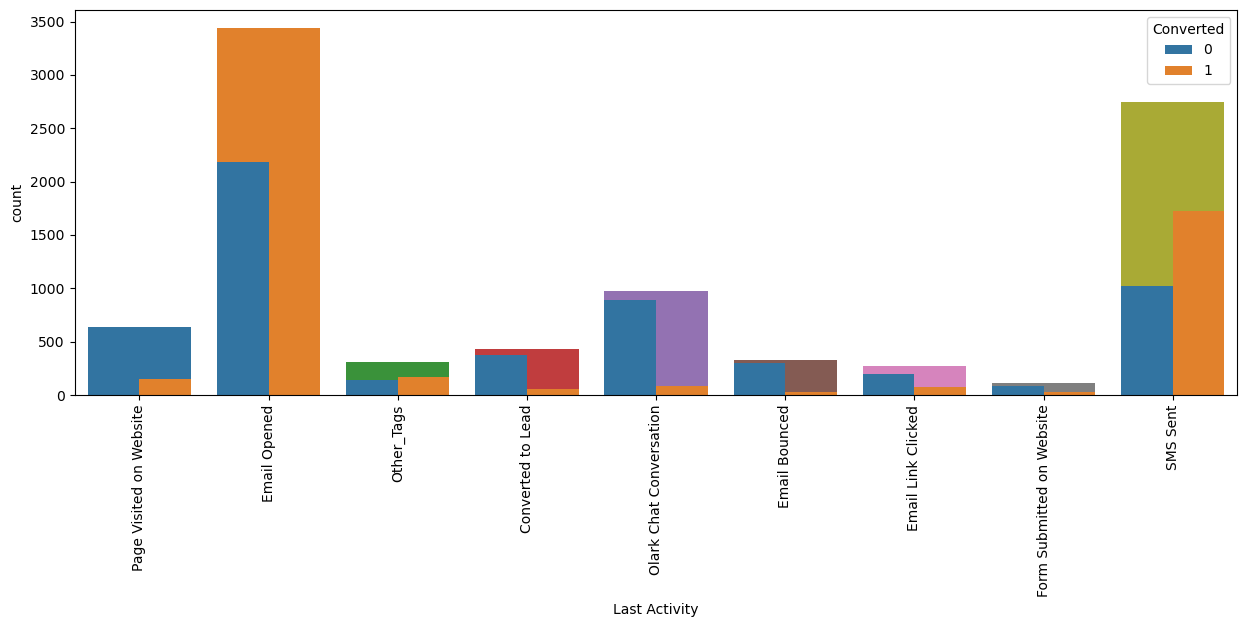

In [56]:
#visualising the spread of data in 'Last Activity' column after data imputation

plt.figure(figsize=(15, 5))

# Create a countplot with 'Last Activity' on the x-axis
plt8 = sns.countplot(data=l_score, x='Last Activity')
plt8.set_xticklabels(plt8.get_xticklabels(), rotation=90)

# Overlay another countplot with 'Last Activity' on the x-axis and 'Converted' as hue
sns.countplot(data=l_score, x='Last Activity', hue='Converted')

plt.show()


#### Findings:
- This is another significant column which should be retained as we can clearly see that for leads having last activity as 'SMS Sent' have the most conversion rate.
- 'Email Opened' brings maximum no.of leads and has second most conversion as well.

#### 9. Analysing 'Lead Origin' column

In [57]:
#checking all value counts of 'Lead Origin' column including the NA values

l_score['Lead Origin'].value_counts(dropna = False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

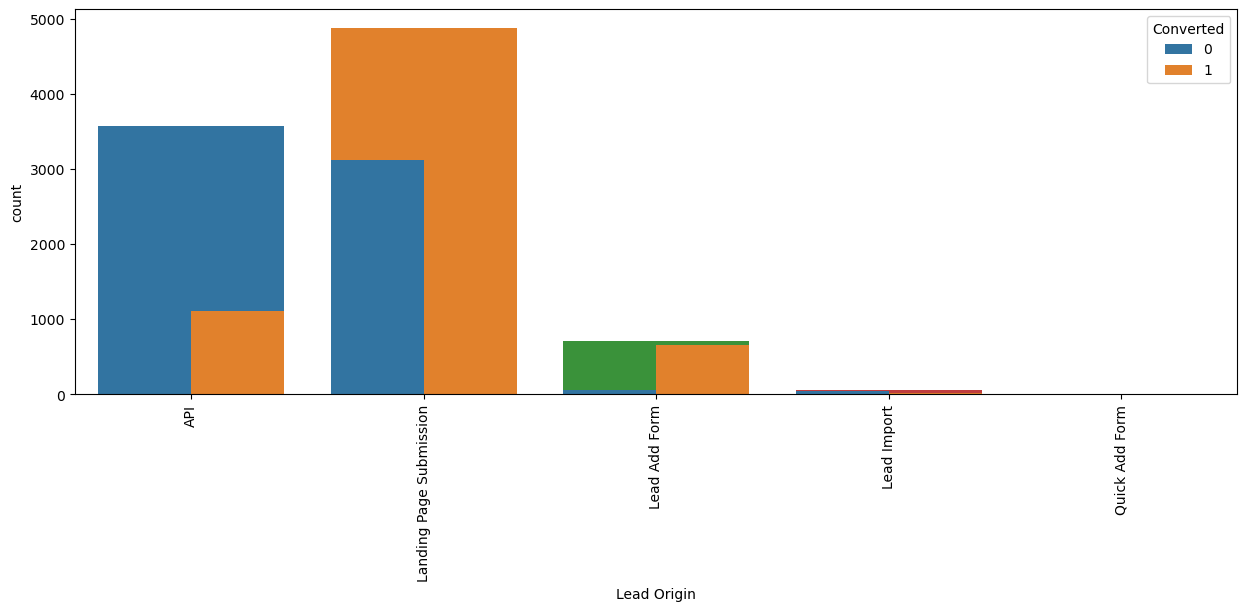

In [58]:
#visualising the spread of data in 'Lead Origin' column

plt.figure(figsize=(15, 5))

# Create a countplot with 'Lead Origin' on the x-axis
plt9 = sns.countplot(data=l_score, x='Lead Origin')
plt9.set_xticklabels(plt9.get_xticklabels(), rotation=90)

# Overlay another countplot with 'Lead Origin' on the x-axis and 'Converted' as hue
sns.countplot(data=l_score, x='Lead Origin', hue='Converted')

plt.show()

#### Findings:
- This is another very significant column as we can see that 'Lead Add Form' is a very good origin of leads due to its very strong conversion rate.
- 'Landing Page Submissions' and 'API' bring a higher amount of leads and see more lead conversion as well.
- Lead Import and Quick Add Form get very few leads.
- To improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

#### 10.  Analysing 'Do Not Email' column

In [59]:
#checking all value counts of 'Do Not Email' column

l_score['Do Not Email'].value_counts(dropna = False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

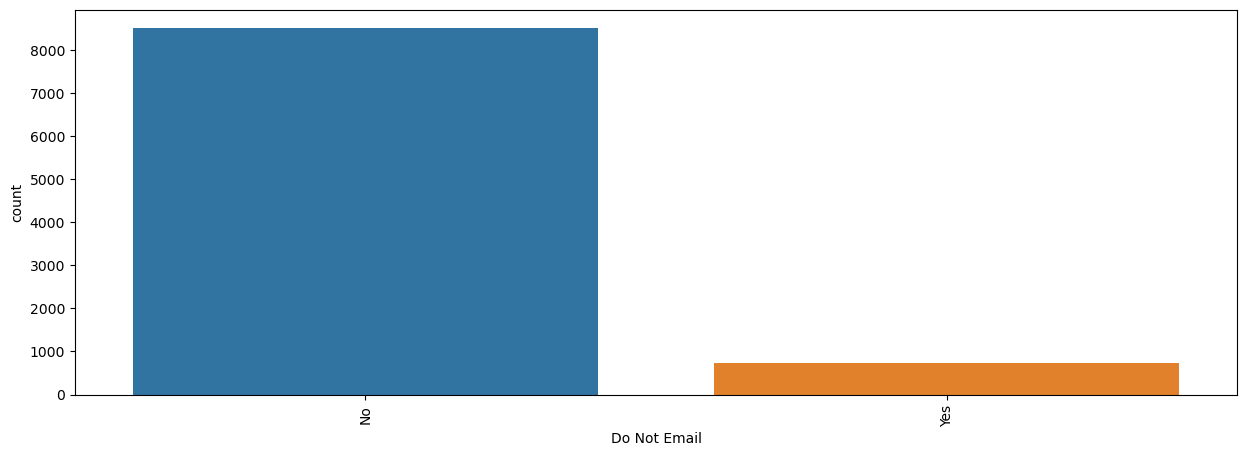

In [60]:
#visualising the spread of data in 'Do Not Email' column

plt.figure(figsize=(15, 5))

# Create a countplot with 'Do Not Email' on the x-axis
plt10 = sns.countplot(data=l_score, x='Do Not Email')
plt10.set_xticklabels(plt10.get_xticklabels(), rotation=90)

plt.show()


#### 11. Analysing 'Do Not Call' column

In [61]:
#checking all value counts of 'Do Not Call' column

l_score['Do Not Call'].value_counts(dropna = False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

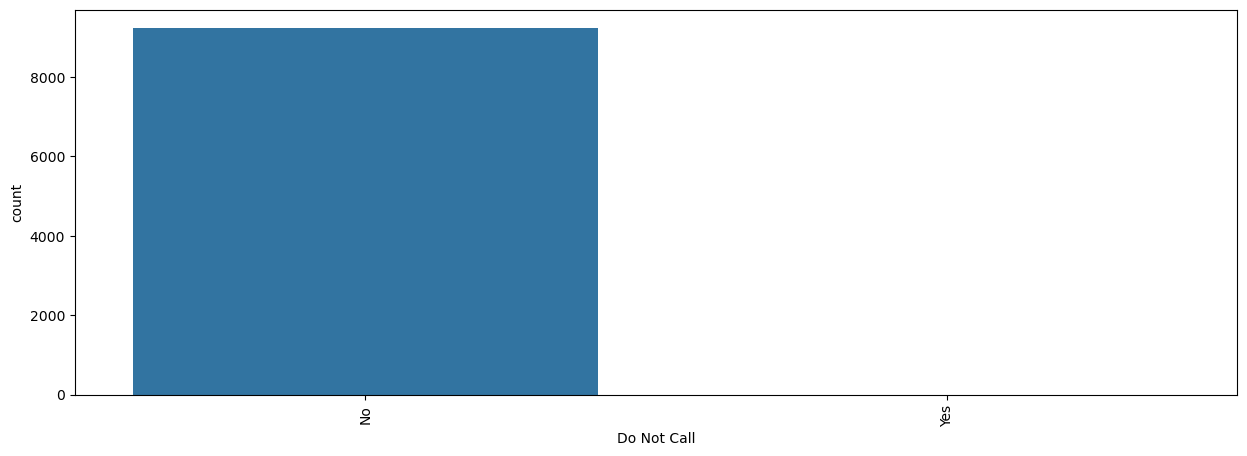

In [62]:
#visualising the spread of data in 'Do Not Call' column

plt.figure(figsize=(15, 5))

# Create a countplot with 'Do Not Call' on the x-axis
plt11 = sns.countplot(data=l_score, x='Do Not Call')
plt11.set_xticklabels(plt11.get_xticklabels(), rotation=90)

plt.show()


#### Findings:
- 'Do Not Mail' column will be retained due to its better spread of data but 'Do Not Call' column will be dropped at the end of this analysis due to highly skewed data spread.

#### 12. Analysing 'A free copy of Mastering The Interview' Column

In [63]:
#checking all value counts of 'A free copy of Mastering The Interview' column

l_score['A free copy of Mastering The Interview'].value_counts(dropna = False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

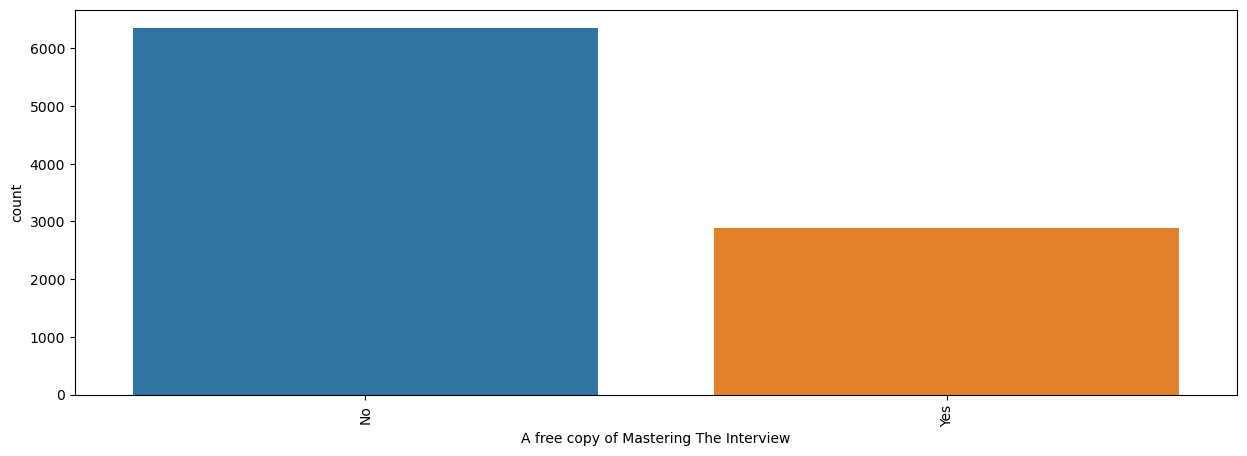

In [64]:
#visualising the spread of data in 'A free copy of Mastering The Interview' column

plt.figure(figsize=(15, 5))

# Create a countplot with 'A free copy of Mastering The Interview' on the x-axis
plt12 = sns.countplot(data=l_score, x='A free copy of Mastering The Interview')
plt12.set_xticklabels(plt12.get_xticklabels(), rotation=90)

plt.show()


#### Findings:
- Since the data is not highly skewed we shall retain this column.


#### 13. Analysing 'Last Notable Activity' column

In [65]:
#checking all value counts of 'Last Notable Activity' column 

l_score['Last Notable Activity'].value_counts(dropna = False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

##### Once again we see a lot of the data points with very low frequency which we can club together under one single term 'Others' .

In [66]:
l_score['Last Notable Activity'] = l_score['Last Notable Activity'].replace(['Email Bounced',
                                      'Unsubscribed',
                                       'Unreachable',
                                       'Had a Phone Conversation',
                                       'Email Marked Spam',
                                       'Approached upfront', 'Resubscribed to emails','View in browser link Clicked', 'View in browser link Clicked',
                                       'Form Submitted on Website', 'Email Received'] , 'Others')


#checking the spread of data in 'Last Notable Activity' column after data imputation

l_score['Last Notable Activity'].value_counts(dropna = False)

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Others                      160
Name: Last Notable Activity, dtype: int64

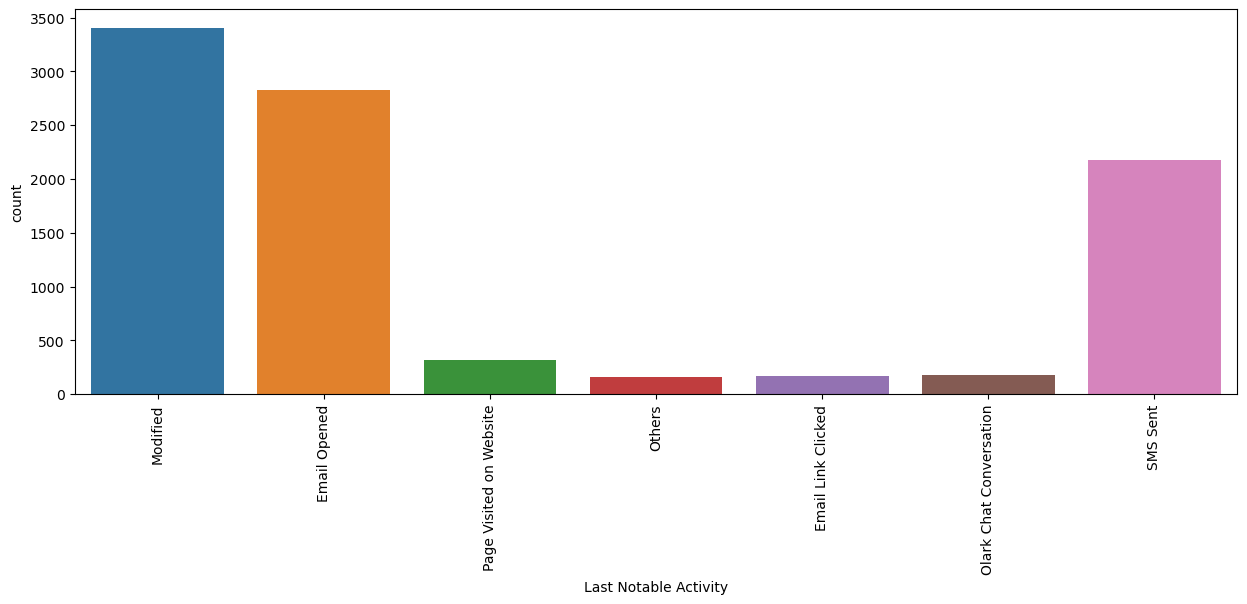

In [67]:
#visualising the spread of data in 'Last Notable Activity' column after data imputation

plt.figure(figsize=(15, 5))

# Create a countplot with 'Last Notable Activity' on the x-axis
plt13 = sns.countplot(data=l_score, x='Last Notable Activity')
plt13.set_xticklabels(plt13.get_xticklabels(), rotation=90)

plt.show()


#### Findings:
- This is another significant column which should be retained as we can clearly see that for leads having last notable activity as 'SMS Sent' have a very high conversion rate.

#### 14. Analysing The Remaining Categorical Columns

In [68]:
#checking all value counts of 'Search' column

l_score['Search'].value_counts(dropna = False)

No     9226
Yes      14
Name: Search, dtype: int64

In [69]:
#checking all value counts of 'Magazine' column

l_score['Magazine'].value_counts(dropna = False)

No    9240
Name: Magazine, dtype: int64

In [70]:
#checking all value counts of 'Newspaper Article' column

l_score['Newspaper Article'].value_counts(dropna = False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [71]:
#checking all value counts of 'X Education Forums' column

l_score['X Education Forums'].value_counts(dropna = False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [72]:
#checking all value counts of 'Newspaper' column

l_score['Newspaper'].value_counts(dropna = False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [73]:
#checking all value counts of 'Digital Advertisement' column

l_score['Digital Advertisement'].value_counts(dropna = False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [74]:
#checking all value counts of 'Receive More Updates About Our Courses' column

l_score['Receive More Updates About Our Courses'].value_counts(dropna = False)

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [75]:
#checking all value counts of 'Update me on Supply Chain Content' column

l_score['Update me on Supply Chain Content'].value_counts(dropna = False)

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [76]:
#checking all value counts of 'Get updates on DM Content' column

l_score['Get updates on DM Content'].value_counts(dropna = False)

No    9240
Name: Get updates on DM Content, dtype: int64

In [77]:
#checking all value counts of 'I agree to pay the amount through cheque' column

l_score['I agree to pay the amount through cheque'].value_counts(dropna = False)

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

#### Findings:
- As we can see the above few columns have highly skewed data and hence it will be better to drop these columns from our analysis.

##### Lets check the percentage of missing values in the data now as we have performed data imputation on missing values in multiple columns

In [78]:
#checking percentage of missing values in dataset

round(100*(l_score.isnull().sum())/len(l_score.index), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

##### As we can see most of the columns have no missing columns and only 2 columns ahve about 1.5% missing values each which are highly insignificant and hence can be dropped altogether.

In [79]:
#dropping the remaining missing values as they are very less and insignificant in number

l_score = l_score.dropna()

In [80]:
# again checking the percentage of missing values

round(100*(l_score.isnull().sum())/len(l_score.index), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

##### As we can see, our dataset has no missing values anymore!

In [81]:
l_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9103 non-null   object 
 1   Lead Source                                    9103 non-null   object 
 2   Do Not Email                                   9103 non-null   object 
 3   Do Not Call                                    9103 non-null   object 
 4   Converted                                      9103 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9103 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9103 non-null   object 
 9   Country                                        9103 

##### Now it is time to drop the categorical columns from our analysis above which had very highly skewed data.

In [82]:
#extracting and dropping the highly skewed data columns

cols_to_be_dropped = ['Country', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 
                     'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations',
                     'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content',
                     'I agree to pay the amount through cheque', 'Do Not Call']

In [83]:
l_score = l_score.drop(cols_to_be_dropped, 1)

In [84]:
l_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

##### Ultimately we are now left with only 10 categorical columns.

### III. Numerical Variables Analysis

#### 1. Analysing 'Converted' column

In [85]:
#checking the proportion of leads who were converted.

converted = (sum(l_score['Converted'])/len(l_score['Converted'].index))*100

converted

38.02043282434362

##### Analysing the correlation of various numerical variable using heatmap.

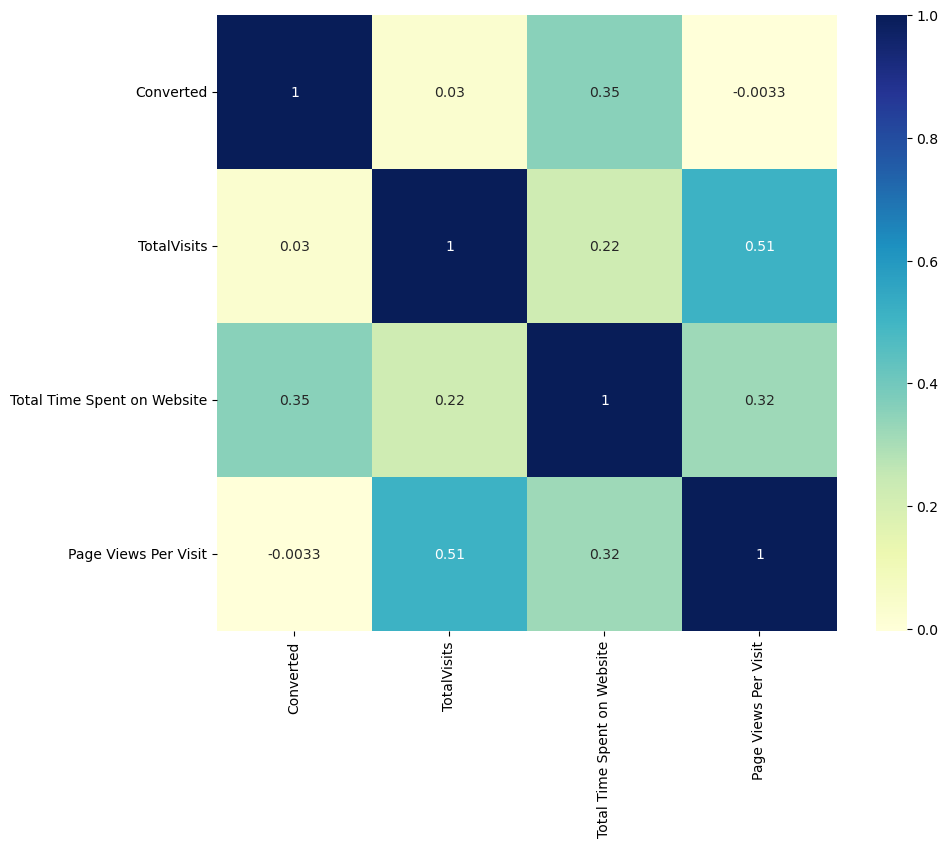

In [86]:
#visualizing correlation of various numerical variable using heatmap.

plt.figure(figsize = (10,8))
sns.heatmap(l_score.corr(), cmap = 'YlGnBu', annot = True)
plt.show()

#### Findings:
- While there is not much to say about the correlation between these numeric variables, 'Total Visits' and 'Page Views Per Visit' have the most correlation with each other. We shall keep this in mind while building our model.

#### 2. Analysing 'Total Visits', 'Page Views Per Visit' and 'Total Time Spent on Website' columns.

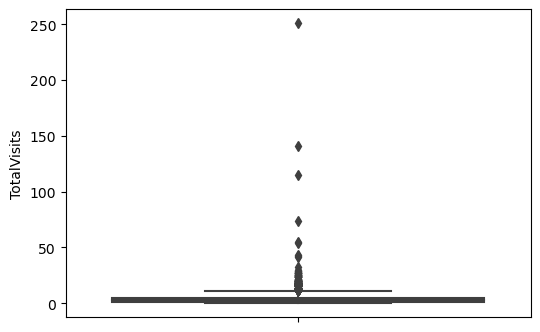

In [87]:
#visualising spread of 'total visits' column thorugh a boxplot

plt.figure(figsize=(6,4))
sns.boxplot(y=l_score['TotalVisits'])
plt.show()

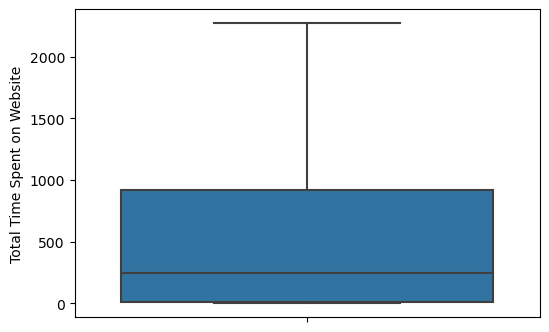

In [88]:
#visualising spread of 'Total Time Spent on Website' column thorugh a boxplot


plt.figure(figsize=(6,4))
sns.boxplot(y=l_score['Total Time Spent on Website'])
plt.show()

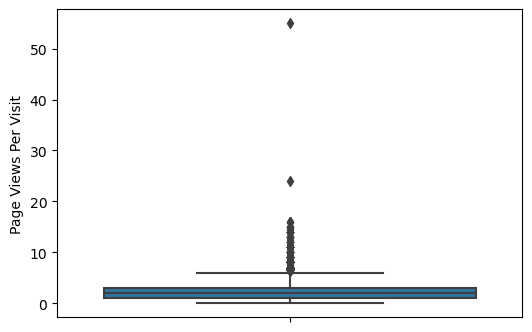

In [89]:
#visualising spread of 'Page Views Per Visit' column thorugh a boxplot

plt.figure(figsize=(6,4))
sns.boxplot(y=l_score['Page Views Per Visit'])
plt.show()

#### Findings:
- The boxplot of 'Total Time Spent on Website' has no outliers.
- The boxplot of 'Page Views Per Visit' and 'Total Visits' have outliers and hence their percentiles must be investigated.

In [90]:
# checking the spread of percentiles of 'TotalVisits' column

l_score['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [91]:
# checking the spread of percentiles of 'Page Views Per Visit' column

l_score['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

##### As we can see, the difference between 99th percentile and max value and min value and 25th percentile is very high for both the columns.
##### Hence we shall drop the top and bottom 1% of datapoints to treat these outliers.

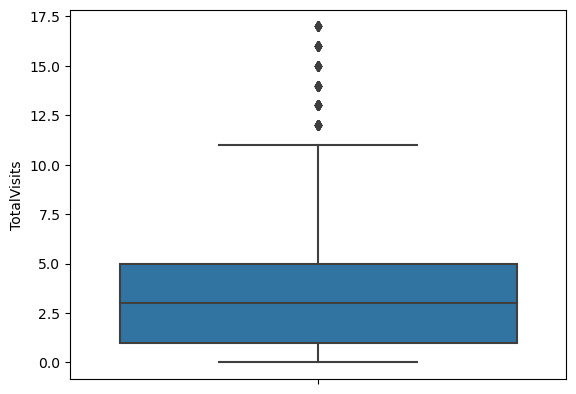

In [92]:
#dropping the top and bottom 1% datapoints to treat outliers and visualizing the spread of 'TotalVisits' column

Q_3 = l_score.TotalVisits.quantile(0.99)
l_score = l_score[(l_score.TotalVisits <= Q_3)]
Q_1 = l_score.TotalVisits.quantile(0.01)
l_score = l_score[(l_score.TotalVisits >= Q_1)]
sns.boxplot(y=l_score['TotalVisits'])
plt.show()

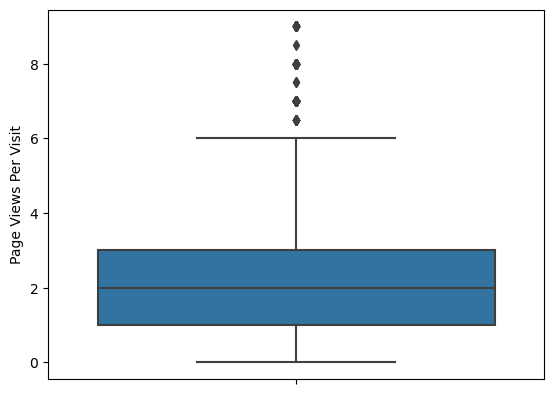

In [93]:
#dropping the top and bottom 1% datapoints to treat outliers and visualizing the spread of 'Page Views Per Visit' column

Q_3 = l_score['Page Views Per Visit'].quantile(0.99)
l_score = l_score[(l_score['Page Views Per Visit'] <= Q_3)]
Q_1 = l_score['Page Views Per Visit'].quantile(0.01)
l_score = l_score[(l_score['Page Views Per Visit'] >= Q_1)]
sns.boxplot(y=l_score['Page Views Per Visit'])
plt.show()

##### Now we can visualise the box plot better and with lesser outliers.

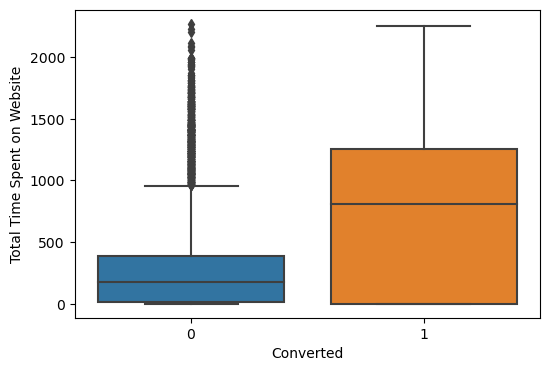

In [94]:
#visualising the spread of Converted vs Total Time Spent on Website

plt.figure(figsize=(6,4))
sns.boxplot(y=l_score['Total Time Spent on Website'], x=l_score['Converted'])
plt.show()

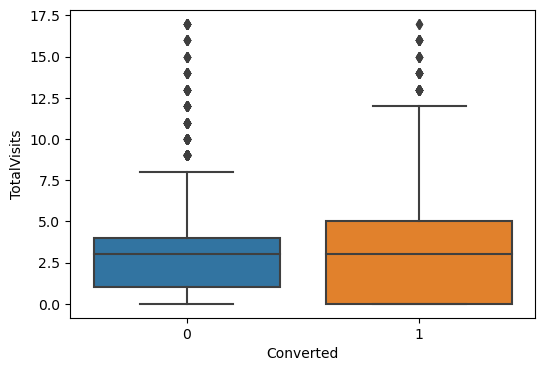

In [95]:
#visualising the spread of Converted vs Total Visits

plt.figure(figsize=(6,4))
sns.boxplot(y=l_score['TotalVisits'], x=l_score['Converted'])
plt.show()

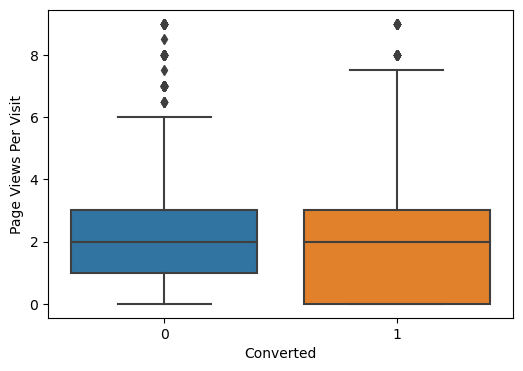

In [96]:
#visualising the spread of Converted vs Page Views Per Visit

plt.figure(figsize=(6,4))
sns.boxplot(y=l_score['Page Views Per Visit'], x=l_score['Converted'])
plt.show()

#### Findings:
- It is evident that leads who spend more time on the website tend to have a higher likelihood of conversion. This observation is supported by the significantly higher median value in the "Total Time Spent on Website vs Converted" column.

- However, for the other two factors being examined, there is insufficient evidence to draw a conclusive conclusion. This is because the medians in these cases are the same, indicating that there may not be a significant correlation between those factors and the conversion rate.

## D. Identifying Categorical Variables Columns and Creating Dummy Variables

### 1. Identifying Columns Having Categorical Variable

In [97]:
l_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8953 non-null   object 
 1   Lead Source                             8953 non-null   object 
 2   Do Not Email                            8953 non-null   object 
 3   Converted                               8953 non-null   int64  
 4   TotalVisits                             8953 non-null   float64
 5   Total Time Spent on Website             8953 non-null   int64  
 6   Page Views Per Visit                    8953 non-null   float64
 7   Last Activity                           8953 non-null   object 
 8   Specialization                          8953 non-null   object 
 9   What is your current occupation         8953 non-null   object 
 10  Tags                                    8953 non-null   obje

In [98]:
#extracting the columns having object datatype and displaying them.

cat_cols= l_score.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### 2. Mapping the binary response categorical columns with only 2 responses

In [99]:
#list of variables to map

var_map = ['Do Not Email', 'A free copy of Mastering The Interview']

#defining the mapping function

def binary_map(x):
    return x.map({'Yes':1, 'No':0})

#applying the mapping function to list of variables
l_score[var_map] = l_score[var_map].apply(binary_map)

In [100]:
#checking the mapping of binary values to the above columns

l_score.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Other_Tags,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,0,Modified


### 3. Creating Dummy Variables For Categorical Variables
- Create Dummy Variables
- Drop The Original Columns For Which Dummy Variables Were Created
- Drop The First Columns As 'p-1' Dummies Can Explain For 'p' Categories 

In [101]:
#create dummy variables and drop first columns

dummy_var_1 = pd.get_dummies(l_score[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

#adding the results to the main dataframe
l_score = pd.concat([l_score,dummy_var_1],1)

In [102]:
#create dummy variables and drop first columns

dummy_var_2 = pd.get_dummies(l_score['Specialization'], prefix  = 'Specialization')
dummy_var_2 = dummy_var_2.drop(['Specialization_Not Specified'], 1)

#adding the results to the main dataframe
l_score = pd.concat([l_score, dummy_var_2], axis = 1)

In [103]:
#create dummy variables and drop first columns

dummy_var_3 = pd.get_dummies(l_score['Lead Source'], prefix  = 'Lead Source')
dummy_var_3 = dummy_var_3.drop(['Lead Source_Others'], 1)

#adding the results to the main dataframe
l_score = pd.concat([l_score, dummy_var_3], axis = 1)

In [104]:
#create dummy variables and drop first columns

dummy_var_4 = pd.get_dummies(l_score['Last Activity'], prefix  = 'Last Activity')
dummy_var_4 = dummy_var_4.drop(['Last Activity_Other_Tags'], 1)

#adding the results to the main dataframe
l_score = pd.concat([l_score, dummy_var_4], axis = 1)

In [105]:
#create dummy variables and drop first columns

dummy_var_5 = pd.get_dummies(l_score['Tags'], prefix  = 'Tags')
dummy_var_5 = dummy_var_5.drop(['Tags_Other_Tags'], 1)

#adding the results to the main dataframe
l_score = pd.concat([l_score, dummy_var_5], axis = 1)

In [106]:
#create dummy variables and drop first columns

dummy_var_6 = pd.get_dummies(l_score['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy_var_6 = dummy_var_6.drop(['Last Notable Activity_Others'], 1)

#adding the results to the main dataframe
l_score = pd.concat([l_score, dummy_var_6], axis = 1)

In [107]:
#Drop The Original Columns For Which Dummy Variables Were Created

l_score.drop(cat_cols, 1, inplace = True)

In [108]:
#check the dummy variables mapping done in main dataframe for categorical columns

l_score.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Tags_Lost to EINS,Tags_Not Specified,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


## E. Logistic Regression Model Building


### 1. Splitting The Dataset
- We will now first split the dataset into train and test datasets in ratio of 70-30
- We will use sklearn package and import train_test_split method

In [109]:
from sklearn.model_selection import train_test_split

#assigning response variable to y
y = l_score['Converted']

#assigning remaining variables to X
X = l_score.drop('Converted', axis=1)

In [110]:
#checking the X dataframe

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Tags_Lost to EINS,Tags_Not Specified,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0


In [111]:
#checking the y dataframe

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [112]:
#splitting the data into 70% train and 30% test dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [113]:
#checking the shape of X_train dataset

X_train.shape

(6267, 55)

In [114]:
#checking the shape of y_train dataset

y_train.shape

(6267,)

In [115]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 55 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6267 non-null   float64
 1   Total Time Spent on Website                           6267 non-null   int64  
 2   Page Views Per Visit                                  6267 non-null   float64
 3   Lead Origin_Landing Page Submission                   6267 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6267 non-null   uint8  
 5   Lead Origin_Lead Import                               6267 non-null   uint8  
 6   What is your current occupation_Housewife             6267 non-null   uint8  
 7   What is your current occupation_Other                 6267 non-null   uint8  
 8   What is your current occupation_Student               6

### 2. Rescaling the numerical variables

In [116]:
#import the required libraries

from sklearn.preprocessing import StandardScaler

#apply scaler to all numeric variables

scaler = StandardScaler()

#extract the numeric columns only

num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

#fit and train the dataset to rescale the numeric variables

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

#check the scaled values of numeric columns

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Tags_Lost to EINS,Tags_Not Specified,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
9196,0.668862,1.848117,1.455819,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4696,-0.030697,-0.037832,0.399961,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3274,0.319082,-0.642138,-0.127967,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
2164,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1667,0.319082,1.258415,-0.481679,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0


### 3. Model Building using Statsmodels and RFE
- Now we shall start building the model manually, initially starting with the 15 best variables as selected by RFE.
- Further we shall check which model is a better fit by dropping unrequired variables depending on their VIF values/p-values.
- As per convention, we shall drop variables either having VIF > 5 or having p-values > 0.05.
- VIF parameter, which indicates multicollinearity must always be < 5 while p-values, which determine significance of the variables must be < 0.05
- We shall use the statsmodels technique as it allows us to also view a detailed summary of different parameters and make better judgements about the model
- We shall keep dropping/adding variables as required to find the best model and then test it against the test dataset.

In [117]:
#import the statsmodel package

import statsmodels.api as sm

In [118]:
#import the required libraries

from sklearn.linear_model import LogisticRegression

#initialize the logarithmic regression function

logreg = LogisticRegression()

#import RFE

from sklearn.feature_selection import RFE

# running RFE with 15 variables as output

rfe = RFE(estimator=logreg, n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [119]:
#display the variables chosen by RFE for builing the initial model along with ranking of rejected variables.

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 26),
 ('Total Time Spent on Website', False, 2),
 ('Page Views Per Visit', False, 24),
 ('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 19),
 ('What is your current occupation_Housewife', False, 27),
 ('What is your current occupation_Other', False, 29),
 ('What is your current occupation_Student', False, 20),
 ('What is your current occupation_Unemployed', False, 21),
 ('What is your current occupation_Working Professional', False, 7),
 ('City_Other Cities', False, 23),
 ('City_Other Cities of Maharashtra', False, 34),
 ('City_Other Metro Cities', False, 39),
 ('City_Thane & Outskirts', False, 37),
 ('City_Tier II Cities', False, 31),
 ('Specialization_Banking, Investment And Insurance', False, 14),
 ('Specialization_Business Administration', False, 41),
 ('Specialization_E-Business', False, 32),
 ('Specialization_E-COMMERCE', False, 22),
 ('Specialization_International Business', F

In [120]:
#list of variables rejected by RFE

X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_T

In [121]:
#extract and assign the chosen columns by RFE to a variable.

rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Not Specified', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

#### I. Building the Model-1

##### List all the VIF values of predictor variables

In [122]:
#import the VIF object

from statsmodels.stats.outliers_influence import variance_inflation_factor

#creating a dataframe consisting of all the predictor variables along with their VIF values

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Source_Welingak Website,1.35
9,Tags_Closed by Horizzon,1.22
8,Tags_Busy,1.09
6,Last Activity_Email Bounced,1.07
10,Tags_Lost to EINS,1.05
4,Lead Source_Referral Sites,1.02
0,Lead Origin_Lead Add Form,0.75
3,Lead Source_Organic Search,0.40
7,Last Activity_Olark Chat Conversation,0.30
14,Last Notable Activity_SMS Sent,0.24


##### Create the first fitted model using Statsmodels

In [123]:
#import the statsmodels library

import statsmodels.api as sm

#add a constant

X_train_sm = sm.add_constant(X_train[rfe_col])

#creating the first fitted model

log_mod_1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res1 = log_mod_1.fit()

#read the summary of the model

res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1416.1
Date:                Mon, 18 Sep 2023   Deviance:                       2832.2
Time:                        20:35:17   Pearson chi2:                 9.42e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5839
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.7006      0.206    -17.959      0.000      -4.104      -3.297
Lead Origin_Lead Add Form                    0.8022      0.441      1.821      0.069      -0.061       1.666
Lead Source_Direct Traffic                  -0.6451      0.152     -4.243      0.000      -0.943      -0.347
Lead Source_Google                           0.0089      0.135      0.066      0.948      -0.256       0.273
Lead Source_Organic Search                  -0.0704      0.175     -0.403      0.687      -0.413       0.272
Lead Source_Referral Sites                  -0.3847      0.441     -0.873      0.383      -1.249       0.479
Lead Source_Welingak Website                 4.2159      1.105      3.817      0.000       2.051       6.381
Last Activity_Email Bounced                 -1.4205      0.418     -3.396      0.001      -2.240      -0.601
Last Activity_Olark Chat Conversation       -1.7121      0.229     -7.483      0.000      -2.161      -1.264
Tags_Busy                                    2.9959      0.267     11.211      0.000       2.472       3.520
Tags_Closed by Horizzon                      9.0151      1.024      8.807      0.000       7.009      11.021
Tags_Lost to EINS                            7.8169      0.619     12.623      0.000       6.603       9.031
Tags_Not Specified                           2.2780      0.180     12.665      0.000       1.925       2.631
Tags_Ringing                                -1.0710      0.274     -3.912      0.000      -1.608      -0.534
Tags_Will revert after reading the email     6.8546      0.237     28.886      0.000       6.390       7.320
Last Notable Activity_SMS Sent               2.4855      0.119     20.947      0.000       2.253       2.718
============================================================================================================
"""

#### Findings:
- The p-value of the variable 'Lead Source_Google' is highest and > 0.05 and hence it makes sense to drop the variable.

In [124]:
#dropping 'Lead Source_Google' column

rfe_col = rfe_col.drop('Lead Source_Google', 1)

#### II. Building the Model-2

##### List all the VIF values of predictor variables

In [125]:
#import the VIF object

from statsmodels.stats.outliers_influence import variance_inflation_factor

#creating a dataframe consisting of all the predictor variables along with their VIF values

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Source_Welingak Website,1.35
8,Tags_Closed by Horizzon,1.16
5,Last Activity_Email Bounced,1.06
7,Tags_Busy,1.05
9,Tags_Lost to EINS,1.03
3,Lead Source_Referral Sites,1.01
0,Lead Origin_Lead Add Form,0.69
2,Lead Source_Organic Search,0.37
6,Last Activity_Olark Chat Conversation,0.30
13,Last Notable Activity_SMS Sent,0.24


##### Create the second fitted model using Statsmodels

In [126]:
#import the statsmodels library

import statsmodels.api as sm

#add a constant

X_train_sm = sm.add_constant(X_train[rfe_col])

#creating the second fitted model

log_mod_2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res2 = log_mod_2.fit()

#read the summary of the model

res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1416.1
Date:                Mon, 18 Sep 2023   Deviance:                       2832.2
Time:                        20:35:17   Pearson chi2:                 9.43e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5839
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.6945      0.184    -20.110      0.000      -4.055      -3.334
Lead Origin_Lead Add Form                    0.7961      0.431      1.848      0.065      -0.048       1.640
Lead Source_Direct Traffic                  -0.6509      0.124     -5.251      0.000      -0.894      -0.408
Lead Source_Organic Search                  -0.0761      0.152     -0.500      0.617      -0.374       0.222
Lead Source_Referral Sites                  -0.3902      0.433     -0.902      0.367      -1.238       0.458
Lead Source_Welingak Website                 4.2166      1.105      3.817      0.000       2.052       6.382
Last Activity_Email Bounced                 -1.4206      0.418     -3.396      0.001      -2.240      -0.601
Last Activity_Olark Chat Conversation       -1.7154      0.223     -7.687      0.000      -2.153      -1.278
Tags_Busy                                    2.9965      0.267     11.220      0.000       2.473       3.520
Tags_Closed by Horizzon                      9.0156      1.024      8.807      0.000       7.009      11.022
Tags_Lost to EINS                            7.8168      0.619     12.623      0.000       6.603       9.030
Tags_Not Specified                           2.2773      0.179     12.687      0.000       1.925       2.629
Tags_Ringing                                -1.0711      0.274     -3.913      0.000      -1.608      -0.535
Tags_Will revert after reading the email     6.8549      0.237     28.892      0.000       6.390       7.320
Last Notable Activity_SMS Sent               2.4857      0.119     20.952      0.000       2.253       2.718
============================================================================================================
"""

#### Findings:
- The p-value of the variable 'Lead Source_Organic Search' is highest and > 0.05 hence it makes sense to drop the variable.

In [127]:
#dropping the 'Lead Source_Organic Search' column

rfe_col = rfe_col.drop('Lead Source_Organic Search', 1)

#### III. Building the Model-3

##### List all the VIF values of predictor variables

In [128]:
#import the VIF object

from statsmodels.stats.outliers_influence import variance_inflation_factor

#creating a dataframe consisting of all the predictor variables along with their VIF values

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Welingak Website,1.35
7,Tags_Closed by Horizzon,1.15
4,Last Activity_Email Bounced,1.05
6,Tags_Busy,1.04
8,Tags_Lost to EINS,1.02
2,Lead Source_Referral Sites,1.01
0,Lead Origin_Lead Add Form,0.68
5,Last Activity_Olark Chat Conversation,0.30
12,Last Notable Activity_SMS Sent,0.24
1,Lead Source_Direct Traffic,0.15


##### Create the third fitted model using Statsmodels

In [129]:
#import the statsmodels library

import statsmodels.api as sm

#add a constant

X_train_sm = sm.add_constant(X_train[rfe_col])

#creating the third fitted model

log_mod_3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res3 = log_mod_3.fit()

#read the summary of the model

res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1416.2
Date:                Mon, 18 Sep 2023   Deviance:                       2832.5
Time:                        20:35:18   Pearson chi2:                 9.53e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5839
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.7125      0.180    -20.585      0.000      -4.066      -3.359
Lead Origin_Lead Add Form                    0.8125      0.430      1.891      0.059      -0.030       1.655
Lead Source_Direct Traffic                  -0.6358      0.120     -5.288      0.000      -0.871      -0.400
Lead Source_Referral Sites                  -0.3765      0.432     -0.872      0.383      -1.223       0.470
Lead Source_Welingak Website                 4.2133      1.105      3.814      0.000       2.048       6.378
Last Activity_Email Bounced                 -1.4247      0.418     -3.412      0.001      -2.243      -0.606
Last Activity_Olark Chat Conversation       -1.7070      0.223     -7.668      0.000      -2.143      -1.271
Tags_Busy                                    2.9971      0.267     11.220      0.000       2.474       3.521
Tags_Closed by Horizzon                      9.0143      1.024      8.806      0.000       7.008      11.021
Tags_Lost to EINS                            7.8211      0.619     12.633      0.000       6.608       9.035
Tags_Not Specified                           2.2827      0.179     12.737      0.000       1.931       2.634
Tags_Ringing                                -1.0689      0.274     -3.905      0.000      -1.605      -0.532
Tags_Will revert after reading the email     6.8573      0.237     28.901      0.000       6.392       7.322
Last Notable Activity_SMS Sent               2.4834      0.119     20.956      0.000       2.251       2.716
============================================================================================================
"""

#### Findings:
- The p-value of the variable 'Lead Source_Referral Sites' is highest and > 0.05 hence it makes sense to drop the variable.

In [130]:
#dropping the 'Lead Source_Referral Sites' column

rfe_col = rfe_col.drop('Lead Source_Referral Sites', 1)

#### IV. Building the Model-4

##### List all the VIF values of predictor variables

In [131]:
#import the VIF object

from statsmodels.stats.outliers_influence import variance_inflation_factor

#creating a dataframe consisting of all the predictor variables along with their VIF values

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Source_Welingak Website,1.35
6,Tags_Closed by Horizzon,1.15
3,Last Activity_Email Bounced,1.05
5,Tags_Busy,1.04
7,Tags_Lost to EINS,1.02
0,Lead Origin_Lead Add Form,0.68
4,Last Activity_Olark Chat Conversation,0.30
11,Last Notable Activity_SMS Sent,0.24
1,Lead Source_Direct Traffic,0.15
10,Tags_Will revert after reading the email,0.13


##### Create the fourth fitted model using Statsmodels

In [132]:
#import the statsmodels library

import statsmodels.api as sm

#add a constant

X_train_sm = sm.add_constant(X_train[rfe_col])

#creating the fourth fitted model

log_mod_4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res4 = log_mod_4.fit()

#read the summary of the model

res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6254
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1416.6
Date:                Mon, 18 Sep 2023   Deviance:                       2833.3
Time:                        20:35:18   Pearson chi2:                 9.54e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5838
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.7263      0.180    -20.713      0.000      -4.079      -3.374
Lead Origin_Lead Add Form                    0.8195      0.429      1.908      0.056      -0.022       1.661
Lead Source_Direct Traffic                  -0.6284      0.120     -5.238      0.000      -0.864      -0.393
Lead Source_Welingak Website                 4.2140      1.105      3.815      0.000       2.049       6.379
Last Activity_Email Bounced                 -1.4218      0.417     -3.406      0.001      -2.240      -0.604
Last Activity_Olark Chat Conversation       -1.7035      0.223     -7.644      0.000      -2.140      -1.267
Tags_Busy                                    3.0036      0.267     11.247      0.000       2.480       3.527
Tags_Closed by Horizzon                      9.0213      1.024      8.813      0.000       7.015      11.028
Tags_Lost to EINS                            7.8297      0.619     12.647      0.000       6.616       9.043
Tags_Not Specified                           2.2881      0.179     12.769      0.000       1.937       2.639
Tags_Ringing                                -1.0622      0.274     -3.882      0.000      -1.598      -0.526
Tags_Will revert after reading the email     6.8608      0.237     28.910      0.000       6.396       7.326
Last Notable Activity_SMS Sent               2.4878      0.118     21.013      0.000       2.256       2.720
============================================================================================================
"""

#### Findings:
- The p-value of the variable 'Lead Origin_Lead Add Form' is highest and > permissible limit (0.05) and hence it makes sense to drop the variable.

In [133]:
#dropping 'Lead Origin_Lead Add Form' column

rfe_col = rfe_col.drop('Lead Origin_Lead Add Form', 1)

#### V. Building the Model-5

##### List all the VIF values of predictor variables


In [134]:
#import the VIF object

from statsmodels.stats.outliers_influence import variance_inflation_factor

#creating a dataframe consisting of all the predictor variables along with their VIF values

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Source_Welingak Website,1.05
2,Last Activity_Email Bounced,1.05
4,Tags_Busy,1.04
6,Tags_Lost to EINS,1.02
5,Tags_Closed by Horizzon,1.01
3,Last Activity_Olark Chat Conversation,0.30
10,Last Notable Activity_SMS Sent,0.24
0,Lead Source_Direct Traffic,0.15
9,Tags_Will revert after reading the email,0.12
8,Tags_Ringing,0.04


##### Create the fifth fitted model using Statsmodels

In [135]:
#import the statsmodels library

import statsmodels.api as sm

#add a constant

X_train_sm = sm.add_constant(X_train[rfe_col])

#creating the first fitted model

log_mod_5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res5 = log_mod_5.fit()

#read the summary of the model

res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6255
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1418.6
Date:                Mon, 18 Sep 2023   Deviance:                       2837.1
Time:                        20:35:18   Pearson chi2:                 1.01e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5835
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.7108      0.179    -20.683      0.000      -4.062      -3.359
Lead Source_Direct Traffic                  -0.6530      0.120     -5.453      0.000      -0.888      -0.418
Lead Source_Welingak Website                 5.0258      1.019      4.930      0.000       3.028       7.024
Last Activity_Email Bounced                 -1.4331      0.420     -3.409      0.001      -2.257      -0.609
Last Activity_Olark Chat Conversation       -1.7220      0.224     -7.687      0.000      -2.161      -1.283
Tags_Busy                                    2.9903      0.267     11.200      0.000       2.467       3.514
Tags_Closed by Horizzon                      9.2285      1.020      9.051      0.000       7.230      11.227
Tags_Lost to EINS                            7.8543      0.619     12.696      0.000       6.642       9.067
Tags_Not Specified                           2.2801      0.179     12.743      0.000       1.929       2.631
Tags_Ringing                                -1.0360      0.272     -3.805      0.000      -1.570      -0.502
Tags_Will revert after reading the email     6.9142      0.236     29.265      0.000       6.451       7.377
Last Notable Activity_SMS Sent               2.4994      0.118     21.140      0.000       2.268       2.731
============================================================================================================
"""

#### Findings:
- As we can see the VIF < 5 for all variables and p-value < 0.05 for all variables hence we can say that Model-5 looks to be our best model.

### 4. Deriving Probabilities, Predictions and Lead Score on Train Data

In [136]:
#getting predicted values on train data

y_train_pred = res5.predict(X_train_sm)
y_train_pred[:10]

9196    0.095568
4696    0.052130
3274    0.744345
2164    0.004352
1667    0.960961
7024    0.192990
8018    0.040986
778     0.192990
6942    0.004352
4440    0.110690
dtype: float64

In [137]:
#creating a dataframe which has y_train dataset values and corresponding y_train predicted values as learnt by X_train

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
9196,1,0.095568,9196
4696,0,0.052130,4696
3274,0,0.744345,3274
2164,0,0.004352,2164
1667,1,0.960961,1667


##### Lets take 0.5 as cut-off value for deciding whether a lead will be converted or not

In [138]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
9196,1,0.095568,9196,0
4696,0,0.052130,4696,0
3274,0,0.744345,3274,1
2164,0,0.004352,2164,0
1667,1,0.960961,1667,1


### 5. Confusion Matrix

In [139]:
#import metrics function 

from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3730  152]
 [ 332 2053]]


In [140]:
#checking the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.922770065422052


In [141]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [142]:
#sensitivity
TP / float(TP+FN)

0.8607966457023061

In [143]:
#specificity
TN / float(TN+FP)

0.9608449252962391

In [144]:
#False Postive Rate - predicting conversion when lead does not have convert
print(FP/ float(TN+FP))

0.03915507470376095


In [145]:
#Positive predictive value 
print (TP / float(TP+FP))

0.9310657596371882


In [146]:
#Negative predictive value
print (TN / float(TN+ FN))

0.9182668636139832


### 6. Plotting ROC Curve

In [147]:
#creating a function for plotting a ROC curve.

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [148]:
#plotting ROC curve for converted and converted probability columns

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, 
                                         drop_intermediate = False )

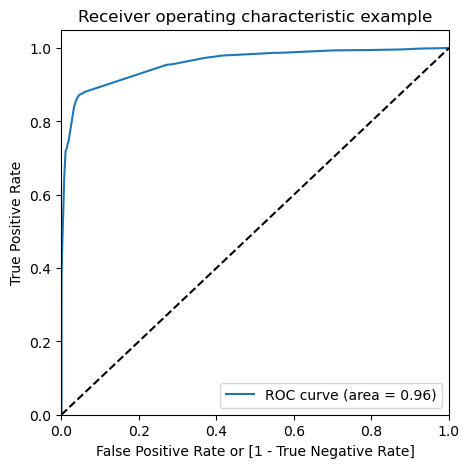

In [149]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### Findings:
- ROC curve should be a value closer to 1 for a good model. We have got a value of 0.96 which is extremely good.

### 7. Finding Optimal Cut-Off

In [150]:
#Creating columns with different probability cutoffs 
nums = [float(x)/10 for x in range(10)]
for i in nums:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
9196,1,0.095568,9196,0,1,0,0,0,0,0,0,0,0,0
4696,0,0.052130,4696,0,1,0,0,0,0,0,0,0,0,0
3274,0,0.744345,3274,1,1,1,1,1,1,1,1,1,0,0
2164,0,0.004352,2164,0,1,0,0,0,0,0,0,0,0,0
1667,1,0.960961,1667,1,1,1,1,1,1,1,1,1,1,1


In [151]:
#Calculating accuracy sensitivity and specificity for various probability cutoffs.
cut_off_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm_1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total_1=sum(sum(cm_1))
    accuracy = (cm_1[0,0]+cm_1[1,1])/total_1
    
    speci = cm_1[0,0]/(cm_1[0,0]+cm_1[0,1])
    sensi = cm_1[1,1]/(cm_1[1,0]+cm_1[1,1])
    cut_off_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cut_off_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.760491  0.973166  0.629830
0.2   0.2  0.917504  0.880084  0.940495
0.3   0.3  0.922930  0.871698  0.954405
0.4   0.4  0.922770  0.860797  0.960845
0.5   0.5  0.922770  0.860797  0.960845
0.6   0.6  0.922770  0.860797  0.960845
0.7   0.7  0.918781  0.839832  0.967285
0.8   0.8  0.890378  0.737945  0.984029
0.9   0.9  0.885910  0.717400  0.989438


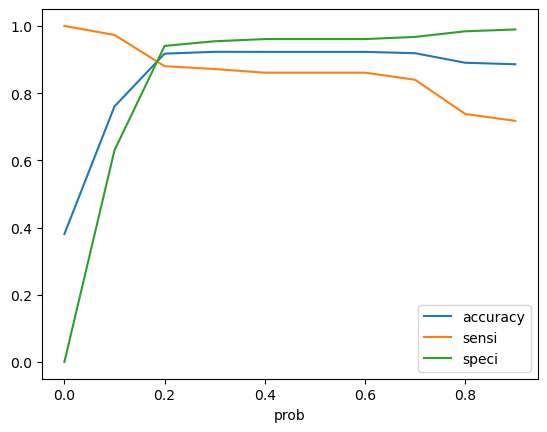

In [152]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cut_off_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### As we see from the above line plot, 0.2 seems to be the most ideal cut-off point.

In [153]:
#using 0.2 as cut-off point for predicting lead conversion

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
9196,1,0.095568,9196,0,1,0,0,0,0,0,0,0,0,0,0
4696,0,0.052130,4696,0,1,0,0,0,0,0,0,0,0,0,0
3274,0,0.744345,3274,1,1,1,1,1,1,1,1,1,0,0,1
2164,0,0.004352,2164,0,1,0,0,0,0,0,0,0,0,0,0
1667,1,0.960961,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [154]:
#calculating the lead score for each lead and displaying only required columns

y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
9196,1,0.095568,9196,0,10
4696,0,0.052130,4696,0,5
3274,0,0.744345,3274,1,74
2164,0,0.004352,2164,0,0
1667,1,0.960961,1667,1,96


In [155]:
#calculating the overall accuracy using optimal cut-off

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9175043880644647

In [156]:
#creating confusion matrix for new cut-off 

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3651,  231],
       [ 286, 2099]], dtype=int64)

In [157]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [158]:
#sensitivity
TP / float(TP+FN)

0.880083857442348

In [159]:
#specificity
TN / float(TN+FP)

0.9404945904173106

In [160]:
#False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.059505409582689336


In [161]:
#Positive predictive value 
print (TP / float(TP+FP))

0.9008583690987124


In [162]:
#Negative predictive value
print (TN / float(TN+ FN))

0.9273558547117094


In [163]:
#Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9310657596371882

In [164]:
#Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8607966457023061

In [165]:
#calculating precision and recall values using the inbuilt library functions

from sklearn.metrics import precision_score, recall_score

In [166]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.9008583690987124

In [167]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.880083857442348

In [168]:
from sklearn.metrics import precision_recall_curve

In [169]:
#plotting recall and precision curve

y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

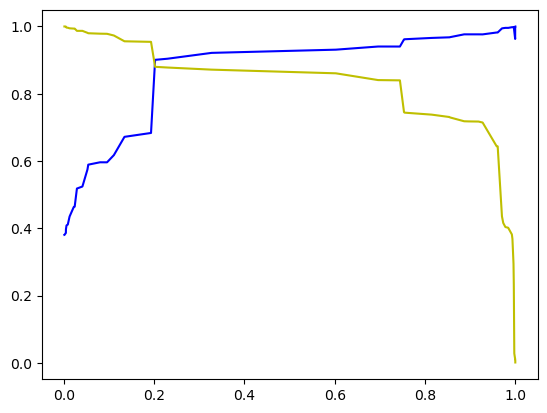

In [170]:
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "y-")
plt.show()

### 8. Final Analysis On Training Dataset
- Our model's ROC curve value stands at an impressive 0.96, signifying excellent performance.

- The model's accuracy rate is 91.75%, showcasing its ability to make accurate predictions.

- Sensitivity, which measures the model's capability to correctly identify positive cases, is at a substantial 88%.

- Specificity, indicating the model's proficiency in correctly identifying negative cases, stands at an impressive 94.04%.

## F. Making Predictions On Test Dataset With Model Built From Training Dataset

### 1. Rescaling the Test Dataset Values

In [171]:
#extracting the numerical columns and assigning them to a variable

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

#scaling the test dataset values

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

#displaying the dataframe with scaled data

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Tags_Lost to EINS,Tags_Not Specified,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
7681,0.575687,-0.311318,0.092860,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
984,-0.090676,-0.550262,0.356568,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
8135,-0.423857,0.812462,-0.170849,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
6915,0.242505,-0.628665,-0.170849,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2712,-0.090676,-0.421456,0.356568,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0


In [172]:
#choosing the columns in test dataset which were chosen by RFE for building our model

X_test = X_test[rfe_col]
X_test.head()

,Lead Source_Direct Traffic,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Not Specified,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_SMS Sent
7681,1,0,0,0,0,0,0,0,1,0,1
984,0,0,0,0,0,0,0,0,0,0,0
8135,1,0,0,0,0,0,0,1,0,0,1
6915,0,0,0,0,0,0,0,0,1,0,0
2712,0,0,0,0,0,0,0,0,0,1,0


### 2. Predicting the Test Data Values

In [173]:
#adding a constant 

X_test_sm = sm.add_constant(X_test)

In [174]:
#predicting the values in test dataset based on model built on training dataset

y_test_pred = res5.predict(X_test_sm)

In [175]:
y_test_pred[:10]

7681    0.052130
984     0.023873
8135    0.602445
6915    0.008604
2712    0.960961
244     0.008604
4698    0.023873
8287    0.040986
6791    0.960961
8970    0.023873
dtype: float64

In [176]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [177]:
y_pred_1.head()

,0
7681,0.052130
984,0.023873
8135,0.602445
6915,0.008604
2712,0.960961


In [178]:
#converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [179]:
#creating a new column 'Prospect ID' using the index values

y_test_df['Prospect ID'] = y_test_df.index

In [180]:
#removing index from both datasets to append them by column

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [181]:
#appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [182]:
#checking the dataframe head

y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.052130
1,0,984,0.023873
2,0,8135,0.602445
3,0,6915,0.008604
4,1,2712,0.960961


In [183]:
#renaming the column

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [184]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.052130
1,0,984,0.023873
2,0,8135,0.602445
3,0,6915,0.008604
4,1,2712,0.960961


In [185]:
#assigning probabability score based on cutoff of 0.2

y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)

In [186]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob,final_Predicted
0,0,7681,0.052130,0
1,0,984,0.023873,0
2,0,8135,0.602445,1
3,0,6915,0.008604,0
4,1,2712,0.960961,1


In [187]:
#checking the overall accuracy

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9214445271779598

### 3. Confusion Matrix

In [188]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1582,   94],
       [ 117,  893]], dtype=int64)

In [189]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [190]:
#Sensitivity
TP / float(TP+FN)

0.8841584158415842

In [191]:
#Specificity
TN / float(TN+FP)

0.9439140811455847

In [192]:
#Precision

precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.9047619047619048

In [193]:
#Recall

recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8841584158415842

### 4. Final Analysis On Test Dataset
- Upon running the trained model on the test dataset we obtain the following figures:
     - Accuracy:    92.14%
     - Sensitivity: 88.40%
     - Specificity: 94.39%

## G. Final Observation

### Variables to be focussed on for bettering the lead conversion ratio:

- Lead Source_Direct Traffic
- Lead Source_Welingak Website
- Last Activity_Email Bounced
- Last Activity_Olark Chat Conversation
- Tags_Busy
- Tags_Closed By Horizon
- Tags_Lost To EINS
- Tags_Not Specified
- Tags_Ringing
- Tags_Will revert after reading the mail
- Last Notable Activity_SMS Sent

### Comparing the values obtained by our Train and Test dataset:
- Train Dataset
     - Accuracy:    91.75%
     - Sensitivity: 88%
     - Specificity: 94.04%
     
     
- Test Dataset
     - Accuracy:    92.14%
     - Sensitivity: 88.40%
     - Specificity: 94.39%

### Based on the above performance parameters, our model looks good enough to be able to give the CEO and the other decision makers enough confidence about making the right business calls.